# Real estate adverts research

The service Yandex.RealEstate has provided us with the archive of real estate deals in Saint-Petersburg and its surrounding areas over a few years. There are two types of data available for each item: data provided by users, and automatically received data based on the items' geographical data; such as a distance to the city centre, airport, parks or water basins.

###### Goal

Determine variables in order to define the market price of real estate items in order to build an automated system for tracking anomalies and fraudulent activities.

###### Plan

1. Review and descriptive analysis
1. Data preprocessing
1. Data augmentation
1. Exploratory analysis
1. Conclusion

## Data review

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

Reading data from the file

In [2]:
try: 
    data = pd.read_csv('https://raw.githubusercontent.com/Rikka-irk/Data-Analysis/main/Exploratory%20Data%20Analysis/real_estate_data.csv', 
                   sep = '\t')
    
except: 
    print('File reading error. Check the URLs')

In [3]:
display(data.head(15))

total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
1              7   3350000.0       40.40  2018-12-04T00:00:00      1   
2             10   5196000.0       56.00  2015-08-20T00:00:00      2   
3              0  64900000.0      159.00  2015-07-24T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
6              6   3700000.0       37.30  2017-11-02T00:00:00      1   
7              5   7915000.0       71.60  2019-04-18T00:00:00      2   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
9             18   5400000.0       61.00  2017-02-26T00:00:00      3   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   
11             9   3300000.0       44.00  2018-08-27T00:00:00      2   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
13            20   3550000.0       42.80  2017-07-01T00:00:00      2   
14             1   4400000.0       36.00  2016-06-23T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.70          16.0        51.00      8          NaN  ...   
1              NaN          11.0        18.60      1          NaN  ...   
2              NaN           5.0        34.30      4          NaN  ...   
3              NaN          14.0          NaN      9          NaN  ...   
4             3.03          14.0        32.00     13          NaN  ...   
5              NaN          12.0        14.40      5          NaN  ...   
6              NaN          26.0        10.60      6          NaN  ...   
7              NaN          24.0          NaN     22          NaN  ...   
8              NaN          27.0        15.43     26          NaN  ...   
9             2.50           9.0        43.60      7          NaN  ...   
10            2.67          12.0        20.30      3          NaN  ...   
11             NaN           5.0        31.00      4        False  ...   
12             NaN           5.0        30.00      5          NaN  ...   
13            2.56           5.0        27.00      5          NaN  ...   
14             NaN           6.0        17.00      1          NaN  ...   

    kitchen_area  balcony              locality_name  airports_nearest  \
0          25.00      NaN            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           18863.0   
1          11.00      2.0             –ø–æ—Å—ë–ª–æ–∫ –®—É—à–∞—Ä—ã           12817.0   
2           8.30      0.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           21741.0   
3            NaN      0.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           28098.0   
4          41.00      NaN            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           31856.0   
5           9.10      NaN  –≥–æ—Ä–æ–¥—Å–∫–æ–π –ø–æ—Å—ë–ª–æ–∫ –Ø–Ω–∏–Ω–æ-1               NaN   
6          14.40      1.0          –ø–æ—Å—ë–ª–æ–∫ –ü–∞—Ä–≥–æ–ª–æ–≤–æ           52996.0   
7          18.90      2.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           23982.0   
8           8.81      NaN             –ø–æ—Å—ë–ª–æ–∫ –ú—É—Ä–∏–Ω–æ               NaN   
9           6.50      2.0            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           50898.0   
10          8.50      NaN            –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           38357.0   
11          6.00      1.0                  –õ–æ–º–æ–Ω–æ—Å–æ–≤           48252.0   
12          9.00      0.0                  –°–µ—Ä—Ç–æ–ª–æ–≤–æ               NaN   
13          5.20      1.0                   –ü–µ—Ç–µ—Ä–≥–æ—Ñ           37868.0   
14          8.00      0.0                     –ü—É—à–∫–∏–Ω           20782.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0  

General information about the dataset: data types, column names, row count

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

### Describing the data

_Apartment description:_
- `rooms`
- `floor` 
- `floors_total` ‚Äî number of stories
- `living_area` ‚Äî living area in square meters (m¬≤)
- `kitchen_area` ‚Äî kitchen area in square meters (–º¬≤)
- `total_area` ‚Äî total area in square meters (–º¬≤)
- `ceiling_height` ‚Äî ceiling heigt in meters (–º)
- `balcony` ‚Äî number of balconies


_Apartment type:_ 
- `is_apartment` ‚Äî apart hotels (boolean type)
- `studio` ‚Äî studio flat (boolean type)
- `open_plan` ‚Äî open plan (boolean type) 

_Photos:_ 
- `total_images` ‚Äî the number of attached images of the flat

_Price:_ 
- `last_price` ‚Äî the last occured price

_Ads' publication timeframe:_ 
- `first_day_exposition` ‚Äî the first publication date
- `days_exposition` ‚Äî the amount of days the ad was active 

_Location:_ 
- `locality_name` ‚Äî the locality name

_Surroundings description based on the geographical data:_ 
- `airports_nearest` ‚Äî  distance to the nearest airport (m)
- `cityCenters_nearest` ‚Äî distance to the city centre (m)
- `parks_around3000` ‚Äî  quantity of parks in a 3 kilometers radius 
- `parks_nearest` ‚Äî distance to the nearest park (m)
- `ponds_around3000` ‚Äî quantity of water basins in a 3 kilometers radius 
- `ponds_nearest` ‚Äî distance to the nearest water basin (m)

**Recieved data contains anomalies:**
1. The column naming is not consistent
1. Not all of the rows have all columns filled
1. The following columns' data types do not match the description: `is_apartment`, `balcony`, `parks_around3000`,`ponds_around3000`, `days_exposition`, `floors_total`
1. The ceilings' height of over 10 meters and less than 2 meters look suspicious
1. The highest price is close to 1 billion rubles which is too expensive even for Saint-Petersburg.

### Conclusion

At this point we can say that we have enough data for the hypothesis verification.    
However there are some missing data, anomalies and occurrence of some abnormal values.

## Data preprocessing

### Renaming columns

Rename the columns according to the standart.

In [6]:
data.columns = data.columns.str.replace('studio', 'is_studio')
data.columns = data.columns.str.replace('open_plan', 'is_open_plan')
data.columns = data.columns.str.replace('cityCenters_nearest', 'city_centers_nearest')
data.columns = data.columns.str.replace('ponds_around3000', 'ponds_around_3000')
data.columns = data.columns.str.replace('parks_around3000', 'parks_around_3000')
data.columns = data.columns.str.replace(' ', '')

### Filling missing values

#### The area of the facility

We can calculate the living area `living_area` from the total area `total_area` and kitchen area `kitchen_area`.   
Because the area of the premises consists not only of the kitchen and living areas, but also hallways and balconies. We can find the average ratio of non-living area using the data without missing values.

Counting rows without missing values.

In [7]:
len(data.loc[(data['living_area'].isnull())|(data['kitchen_area'].isnull())])

2717

Creating an additional table with total area data

In [8]:
area_stat = data.loc[
        ~data['living_area'].isnull() 
        &
        ~data['kitchen_area'].isnull() 
        &
        ~data['total_area'].isnull() 
        ][['living_area','kitchen_area','total_area']]
area_stat

living_area  kitchen_area  total_area
0             51.0         25.00      108.00
1             18.6         11.00       40.40
2             34.3          8.30       56.00
4             32.0         41.00      100.00
5             14.4          9.10       30.40
...            ...           ...         ...
23692         17.5          6.00       30.00
23693         40.0          8.00       62.40
23694         73.3         13.83      133.81
23695         38.0          8.50       59.00
23698         12.3          9.00       32.30

[20982 rows x 3 columns]

Subtract the kitchen and the living area from the total area to get the non-living area (hallways and balconies).
Find its ratio.

In [9]:
area_stat['ratio_corridor_area'] = round((area_stat.total_area - area_stat.kitchen_area - area_stat.living_area)/area_stat.total_area, 2)
area_stat

living_area  kitchen_area  total_area  ratio_corridor_area
0             51.0         25.00      108.00                 0.30
1             18.6         11.00       40.40                 0.27
2             34.3          8.30       56.00                 0.24
4             32.0         41.00      100.00                 0.27
5             14.4          9.10       30.40                 0.23
...            ...           ...         ...                  ...
23692         17.5          6.00       30.00                 0.22
23693         40.0          8.00       62.40                 0.23
23694         73.3         13.83      133.81                 0.35
23695         38.0          8.50       59.00                 0.21
23698         12.3          9.00       32.30                 0.34

[20982 rows x 4 columns]

In [10]:
area_stat.ratio_corridor_area.describe()

count    20982.000000
mean         0.250492
std          0.071873
min         -0.580000
25%          0.210000
50%          0.250000
75%          0.290000
max          0.860000
Name: ratio_corridor_area, dtype: float64

It resulted that in some of the facilities the total area is less than the sum of the living and the kitchen areas.

In [11]:
area_stat = area_stat.loc[area_stat['ratio_corridor_area']>0]
area_stat.describe()

living_area  kitchen_area    total_area  ratio_corridor_area
count  20844.000000  20844.000000  20844.000000         20844.000000
mean      34.580996     10.487344     60.575593             0.252596
std       21.853293      5.773149     34.476727             0.066642
min        2.000000      1.300000     14.000000             0.010000
25%       18.800000      7.000000     40.500000             0.210000
50%       30.000000      9.000000     52.300000             0.250000
75%       42.500000     12.000000     70.000000             0.290000
max      409.700000    112.000000    900.000000             0.860000

Calculate the average hallway area ratio.

In [12]:
mean_corridor_area = area_stat['ratio_corridor_area'].mean()

Create pairwise masks for slices:  
* the kitchen area is filled but the living area is not
* vice-versa; the living area is filled and the kitchen is not 
* both are null
* any are null

In [13]:
kitchen_is_null_mask = (~data['living_area'].isnull()&data['kitchen_area'].isnull())
living_is_null_mask = (data['living_area'].isnull()&~data['kitchen_area'].isnull())
both_are_null_mask = (data['living_area'].isnull()&data['kitchen_area'].isnull())
any_is_null_mask = (data['living_area'].isnull())|(data['kitchen_area'].isnull())

Count how many ads have at least one field missing.

In [14]:
len(data.loc[any_is_null_mask])

2717

Set a variable with the calculated values of the living areas. Although the calculations are linked to both columns we can not immediately write the results into the dataframe.

In [15]:
living_area_correct = \
(data.loc[living_is_null_mask,'total_area']-
 (data.loc[living_is_null_mask,'total_area'] * mean_corridor_area)-
 data.loc[living_is_null_mask,'kitchen_area']
)
living_area_correct

7        34.614096
116      54.347627
165      34.793695
238      20.037315
360      33.039822
           ...    
23534    19.148739
23584    41.328636
23587    51.771514
23588    41.570846
23697    34.063224
Length: 439, dtype: float64

Set a variable with the calculated areas of the kitchens.

In [16]:
kitchen_area_correct = \
(data.loc[kitchen_is_null_mask,'total_area'] - 
 data.loc[kitchen_is_null_mask,'total_area'] * 
 mean_corridor_area -
 data.loc[kitchen_is_null_mask,'living_area'] 
)
kitchen_area_correct

144       4.679896
155      53.926931
178      24.952746
188      10.275037
199      10.952893
           ...    
23592     3.674704
23604     6.109978
23637     2.432493
23655    10.669845
23696    12.677782
Length: 814, dtype: float64

Assign the calculated values into the dataframe.

In [17]:
data.loc[living_is_null_mask,'living_area'] = living_area_correct
data.loc[kitchen_is_null_mask,'kitchen_area'] = kitchen_area_correct

Overwrite the masks according to the completed missing values.

In [18]:
kitchen_is_null_mask = (~data['living_area'].isnull()&data['kitchen_area'].isnull())
living_is_null_mask = (data['living_area'].isnull()&~data['kitchen_area'].isnull())
both_are_null_mask = (data['living_area'].isnull()&data['kitchen_area'].isnull())
any_is_null_mask = (data['living_area'].isnull())|(data['kitchen_area'].isnull())

Now we can do the calculation for the rows with both values missing ‚Äî the living and the kitchen areas.   
For such cases we can assume that the kitchen area is a third part of the total area and the living room is two thirds including hallways.

In [19]:
kitchen_area_correct = (
    (data.loc[both_are_null_mask,'total_area'] -
    data.loc[both_are_null_mask,'total_area'] * mean_corridor_area)
    /3
)
kitchen_area_correct

3        39.612389
30        8.171612
37       11.410361
44        9.965381
59       11.584755
           ...    
23632     9.467112
23642    20.005502
23663    21.923838
23670    11.360534
23679     8.719708
Name: total_area, Length: 1464, dtype: float64

In [20]:
living_area_correct  = (
    (data.loc[both_are_null_mask,'total_area'] -
    data.loc[both_are_null_mask,'total_area'] * mean_corridor_area)
    /3*2
)
living_area_correct

3        79.224778
30       16.343225
37       22.820722
44       19.930762
59       23.169511
           ...    
23632    18.934224
23642    40.011004
23663    43.847676
23670    22.721069
23679    17.439417
Name: total_area, Length: 1464, dtype: float64

Writing calculated values into the dataset.

In [21]:
data.loc[both_are_null_mask,'kitchen_area'] = kitchen_area_correct
data.loc[both_are_null_mask,'living_area'] = living_area_correct

In [22]:
kitchen_is_null_mask = (~data['living_area'].isnull()&data['kitchen_area'].isnull())
living_is_null_mask = (data['living_area'].isnull()&~data['kitchen_area'].isnull())
both_are_null_mask = (data['living_area'].isnull()&data['kitchen_area'].isnull())
any_is_null_mask = (data['living_area'].isnull())|(data['kitchen_area'].isnull())

Ensure that all the missing values were filled.
+–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ –≤—Å–µ –ø—Ä–æ–ø—É—Å–∫–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã.

In [23]:
len(data.loc[any_is_null_mask])

0

–ü–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ —É –Ω–∞—Å –æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –Ω–µ—Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ –º–∞–ª–µ–Ω—å–∫–∏–µ –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–æ–Ω—å. –í–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ –ø–æ—Ç–æ–º—É, —á—Ç–æ —É —Å—Ç—É–¥–∏–π –Ω–µ—Ç –∫–æ—Ä–∏–¥–æ—Ä–∞ –∏ –º—ã –≤—ã—á–ª–∏ –∏–∑ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ –ª–∏—à–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ. 

–î–ª—è —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞–µ–≤ –ø–µ—Ä–µ–∑–∞–ø–∏—à–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—É—é –ø–ª–æ—â–∞–¥—å –∫—É—Ö–Ω–∏ –Ω–∞ —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –æ–±—â–µ–π –∏ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥—è–º–∏.

In [24]:
negative_kitchen_mask = data['kitchen_area']<3

In [25]:
len(data.loc[negative_kitchen_mask,'kitchen_area'])

348

In [26]:
data.loc[negative_kitchen_mask,'kitchen_area'] = (
    data.loc[negative_kitchen_mask,'total_area'] -
    data.loc[negative_kitchen_mask,'living_area']
)
negative_kitchen_mask = data['kitchen_area']<3
len(data.loc[negative_kitchen_mask,'kitchen_area'])

17

In [27]:
data[['kitchen_area','living_area','total_area']].describe()

kitchen_area   living_area    total_area
count  23699.000000  23699.000000  23699.000000
mean      10.848457     34.306862     60.348651
std        6.466297     22.333297     35.654083
min        0.000000      1.943176     12.000000
25%        7.100000     18.800000     40.000000
50%        9.400000     30.000000     52.000000
75%       12.000000     42.000000     69.900000
max      134.013356    411.611652    900.000000

–¢–µ–ø–µ—Ä—å –∑–Ω–∞—á–µ–Ω–∏—è –ø–ª–æ—â–∞–¥–µ–π –ø–æ–º–µ—â–µ–Ω–∏–π –≤—ã–≥–ª—è–¥—è—Ç —Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ –∏ –¥–æ—Å—Ç–æ–≤–µ—Ä–Ω–æ.

#### –≠—Ç–∞–∂–Ω–æ—Å—Ç—å –∑–¥–∞–Ω–∏—è 
–£ –Ω–∞—Å –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ–± —ç—Ç–∞–∂–∞—Ö, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞—Ö–æ–¥—è—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä—ã, –Ω–æ –ø—Ä–æ–ø—É—â–µ–Ω—ã –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–± —ç—Ç–∞–∂–Ω–æ—Å—Ç—è—Ö —Å–∞–º–∏—Ö –∑–¥–∞–Ω–∏–π `floors_total`.

In [28]:
len(data.loc[data['floors_total'].isnull()])

86

–¢–∞–∫ –∫–∞–∫ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –æ—á–µ–Ω—å –º–∞–ª–æ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞, –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –∏—Ö –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è —ç—Ç–∞–∂–µ–π, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞—Ö–æ–¥—è—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä—ã.

In [29]:
data.loc[data['floors_total'].isnull(), 'floors_total'] = data.loc[data['floors_total'].isnull(),'floor']

In [30]:
len(data.loc[data['floors_total'].isnull()])

0

#### –í—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤

In [31]:
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

–î–∞–Ω–Ω—ã–µ –≤ —Å—Ç–æ–ª–±—Ü–µ `ceiling_height` —Å–æ–¥–µ—Ä–∂–∞—Ç –∞–Ω–æ–º–∞–ª–∏–∏ –≤ –≤–∏–¥–µ –Ω–µ—Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ –±–æ–ª—å—à–∏—Ö –∏  –º–∞–ª–µ–Ω—å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π. 
–î–ª—è –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ –ª—É—á—à–µ —Å–Ω–∞—á–∞–ª–∞ —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å –∞–Ω–æ–º–∞–ª–∏—è–º–∏ –∏ —É–∂–µ –ø–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å —Å—Ä–µ–¥–Ω—é—é –≤—ã—Å–æ—Ç—É –ø–æ—Ç–æ–ª–∫–æ–≤ –∏ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –µ—é –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ü–æ—ç—Ç–æ–º—É –≤–µ—Ä–Ω–µ–º—Å—è –∫ —ç—Ç–æ–º—É –≤–æ–ø—Ä–æ—Å—É –≤ —Ä–∞–∑–¥–µ–ª–µ <a href="#–ü—Ä–æ–≤–µ—Ä–∫–∞-–¥–∞–Ω–Ω—ã—Ö-–Ω–∞-–∞–Ω–æ–º–∞–ª–∏–∏-–∏-–∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è" data-toc-modified-id="–ü—Ä–æ–≤–µ—Ä–∫–∞-–¥–∞–Ω–Ω—ã—Ö-–Ω–∞-–∞–Ω–æ–º–∞–ª–∏–∏-–∏-–∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è-2.4">–ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –∞–Ω–æ–º–∞–ª–∏–∏ –∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è</a>.

#### –ê–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç—ã 

–ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —á–µ—Å—Ç–Ω–æ —É–∫–∞–∑—ã–≤–∞—é—Ç, –∫–æ–≥–¥–∞ –∫–≤–∞—Ä—Ç–∏—Ä–∞ –≤—Ö–æ–¥–∏—Ç –≤ —Ä–∞–∑—Ä—è–¥ –∞–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç–æ–≤. –ü–æ—ç—Ç–æ–º—É –ø—Ä–æ—É—â–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –∫–∞–∫ "–Ω–µ –∞–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç—ã". –í —Å–≤—è–∑–∏ —Å —ç—Ç–∏–º –∑–∞–ø–æ–ª–Ω–∏–º –ø—Ä–æ–ø—É—Å–∫–∏ –∑–Ω–∞—á–µ–Ω–∏–µ–º `False`

In [32]:
data.loc[data['is_apartment'].isnull()]

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70          16.0    51.000000      8          NaN  ...   
1                 NaN          11.0    18.600000      1          NaN  ...   
2                 NaN           5.0    34.300000      4          NaN  ...   
3                 NaN          14.0    79.224778      9          NaN  ...   
4                3.03          14.0    32.000000     13          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23694            3.70           5.0    73.300000      3          NaN  ...   
23695             NaN           5.0    38.000000      4          NaN  ...   
23696             NaN           3.0    29.700000      1          NaN  ...   
23697            3.00          17.0    34.063224     12          NaN  ...   
23698            2.50           5.0    12.300000      1          NaN  ...   

       kitchen_area  balcony        locality_name  airports_nearest  \
0         25.000000      NaN      –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           18863.0   
1         11.000000      2.0       –ø–æ—Å—ë–ª–æ–∫ –®—É—à–∞—Ä—ã           12817.0   
2          8.300000      0.0      –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           21741.0   
3         39.612389      0.0      –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           28098.0   
4         41.000000      NaN      –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           31856.0   
...             ...      ...                  ...               ...   
23694     13.830000      NaN      –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           24665.0   
23695      8.500000      NaN                –¢–æ—Å–Ω–æ               NaN   
23696     12.677782      NaN     —Å–µ–ª–æ –†–æ–∂–¥–µ—Å—Ç–≤–µ–Ω–æ               NaN   
23697     23.300000      2.0      –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           39140.0   
23698      9.000000      NaN  –ø–æ—Å–µ–ª–æ–∫ –ù–æ–≤—ã–π –£—á—Ö–æ–∑               NaN   

      city_centers_nearest  parks_around_3000  parks_nearest  \
0                  16028.0                1.0          482.0   
1                  18603.0                0.0            NaN   
2                  13933.0                1.0           90.0   
3                   6800.0                2.0           84.0   
4                   8098.0                2.0          112.0   
...                    ...                ...            ...   
23694               4232.0                1.0          796.0   
23695                  NaN                NaN            NaN   
23696                  NaN                NaN            NaN   
23697              10364.0                2.0          173.0   
23698                  NaN                NaN            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
0                    2.0          755.0              NaN  
1                    0.0            NaN             81.0  
2                    2.0          574.0            558.0  
3                    3.0          234.0            424.0  
4                    1.0           48.0            121.0  
...                  ...            ...              ...  
23694       

In [33]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [34]:
len(data.loc[data['is_apartment'].isnull()])

20924

In [35]:
data['is_apartment'].fillna(value=False,inplace=True) 

In [36]:
len(data.loc[data['is_apartment'].isnull()])

0

#### –ë–∞–ª–∫–æ–Ω—ã

–í —Å—Ç–æ–ª–±—Ü–µ `balcony` –µ—Å—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏. –°–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ, —ç—Ç–æ –æ–∑–Ω–∞—á–∞–µ—Ç, —á—Ç–æ –±–∞–∫–æ–Ω–∞ –≤ –∫–≤–∞—Ä—Ç–∏—Ä–µ –Ω–µ—Ç. –ü–æ–¥—Å—Ç–∞–≤–∏–º –≤–º–µ—Å—Ç–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –∑–Ω–∞—á–µ–Ω–∏—è "0".

In [37]:
len(data.loc[data['balcony'].isnull()]['balcony'])

11519

In [38]:
data['balcony'].fillna(value=0,inplace=True)  

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ —Å—Ç–æ–ª–±–µ—Ü –∑–∞–ø–æ–ª–Ω–∏–ª—Å—è –∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–µ –æ—Å—Ç–∞–ª–æ—Å—å.

In [39]:
len(data.loc[data['balcony'].isnull()]['balcony']) 

0

In [40]:
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [41]:
data['balcony'].value_counts().sum()

23699

#### –ù–∞–∑–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞ 


–ó–∞–º–µ–Ω–∏–º –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ `locality_name` –Ω–∞ '–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö'

In [42]:
len(data.loc[data['locality_name'].isnull()]['locality_name'])

49

In [43]:
data['locality_name'].fillna('–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö',inplace=True)

In [44]:
len(data.loc[data['locality_name'].isnull()]['locality_name'])

0

–í —Å—Ç–æ–ª–±—Ü–µ `locality_name` –º–Ω–æ–≥–∏–µ –Ω–∞–∑–≤–∞–Ω–∏—è –∑–∞–ø–∏—Å–∞–Ω—ã –≤ —Ä–∞–∑–Ω—ã—Ö —Ñ–æ—Ä–º–∞—Ç–∞—Ö, –Ω–∞–ø—Ä–∏–º–µ—Ä, "–ö—É–¥—Ä–æ–≤–æ", "–ø–æ—Å–µ–ª–æ–∫ –ö—É–¥—Ä–æ–≤–æ", "–ø–æ—Å—ë–ª–æ–∫ –ö—É–¥—Ä–æ–≤–æ". –í —Å–≤—è–∑–∏ —Å —ç—Ç–∏–º –∏–∑–±–∞–≤–∏–º—Å—è –æ—Ç –ª–∏—à–Ω–∏—Ö –¥–µ—Ç–∞–ª–µ–π –∏ –æ—Å—Ç–∞–≤–∏–º –ª–∏—à—å –Ω–∞–∑–≤–∞–Ω–∏—è.

In [45]:
len(data.loc[data['locality_name'].isnull()]['locality_name'])

0

In [46]:
len(data['locality_name'].sort_values().unique())

365

–ü—Ä–∏–≤–µ–¥–µ–º –Ω–∞–∑–≤–∞–Ω–∏—è –∂–∏–ª—ã—Ö —Ä–∞–π–æ–Ω–æ–≤ –∫ –µ–¥–∏–Ω–æ–º—É —Å—Ç–∏–ª—é: —É–±–µ—Ä–µ–º –∏–∑ –Ω–∞–∑–≤–∞–Ω–∏—è —Ç–∞–∫–∏–µ —Å–ª–æ–≤–∞ –∫–∞–∫ `–¥–µ—Ä–µ–≤–Ω—è`,`–ø–æ—Å—ë–ª–æ–∫`,`–≥–æ—Ä–æ–¥—Å–∫–æ–π`,`—Å–∞–¥–æ–≤–æ–µ —Ç–æ–≤–∞—Ä–∏—â–µ—Å—Ç–≤–æ`,`—Å–µ–ª–æ` –∏ —Ç.–ø.

In [47]:
data['locality_name'].sort_values().unique()

array(['–ë–æ–∫—Å–∏—Ç–æ–≥–æ—Ä—Å–∫', '–í–æ–ª–æ—Å–æ–≤–æ', '–í–æ–ª—Ö–æ–≤', '–í—Å–µ–≤–æ–ª–æ–∂—Å–∫', '–í—ã–±–æ—Ä–≥',
       '–í—ã—Å–æ—Ü–∫', '–ì–∞—Ç—á–∏–Ω–∞', '–ó–µ–ª–µ–Ω–æ–≥–æ—Ä—Å–∫', '–ò–≤–∞–Ω–≥–æ—Ä–æ–¥', '–ö–∞–º–µ–Ω–Ω–æ–≥–æ—Ä—Å–∫',
       '–ö–∏–Ω–≥–∏—Å–µ–ø–ø', '–ö–∏—Ä–∏—à–∏', '–ö–∏—Ä–æ–≤—Å–∫', '–ö–æ–ª–ø–∏–Ω–æ', '–ö–æ–º–º—É–Ω–∞—Ä',
       '–ö—Ä–∞—Å–Ω–æ–µ –°–µ–ª–æ', '–ö—Ä–æ–Ω—à—Ç–∞–¥—Ç', '–ö—É–¥—Ä–æ–≤–æ', '–õ–æ–¥–µ–π–Ω–æ–µ –ü–æ–ª–µ',
       '–õ–æ–º–æ–Ω–æ—Å–æ–≤', '–õ—É–≥–∞', '–õ—é–±–∞–Ω—å', '–ú—É—Ä–∏–Ω–æ', '–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö',
       '–ù–∏–∫–æ–ª—å—Å–∫–æ–µ', '–ù–æ–≤–∞—è –õ–∞–¥–æ–≥–∞', '–û—Ç—Ä–∞–¥–Ω–æ–µ', '–ü–∞–≤–ª–æ–≤—Å–∫', '–ü–µ—Ç–µ—Ä–≥–æ—Ñ',
       '–ü–∏–∫–∞–ª—ë–≤–æ', '–ü–æ–¥–ø–æ—Ä–æ–∂—å–µ', '–ü—Ä–∏–º–æ—Ä—Å–∫', '–ü—Ä–∏–æ–∑–µ—Ä—Å–∫', '–ü—É—à–∫–∏–Ω',
       '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥', '–°–≤–µ—Ç–æ–≥–æ—Ä—Å–∫', '–°–µ—Ä—Ç–æ–ª–æ–≤–æ', '–°–µ—Å—Ç—Ä–æ—Ä–µ—Ü–∫',
       '–°–ª–∞–Ω—Ü—ã', '–°–æ—Å–Ω–æ–≤—ã–π –ë–æ—Ä', '–°—è—Å—å—Å—Ç—Ä–æ–π', '–¢–∏—Ö–≤–∏–Ω', '–¢–æ—Å–Ω–æ',
       '–®–ª–∏—Å—Å–µ–ª—å–±—É—Ä–≥'

In [48]:
data['locality_name'] = data['locality_name'].str.replace('–¥–µ—Ä–µ–≤–Ω—è ', '')
data['locality_name'] = data['locality_name'].str.replace('–ø–æ—Å—ë–ª–æ–∫ ', '')
data['locality_name'] = data['locality_name'].str.replace('–ø–æ—Å–µ–ª–æ–∫ ', '')
data['locality_name'] = data['locality_name'].str.replace('–≥–æ—Ä–æ–¥—Å–∫–æ–≥–æ —Ç–∏–ø–∞ ', '')
data['locality_name'] = data['locality_name'].str.replace('–≥–æ—Ä–æ–¥—Å–∫–æ–π ', '')
data['locality_name'] = data['locality_name'].str.replace('–∫–æ—Ç—Ç–µ–¥–∂–Ω—ã–π ', '')
data['locality_name'] = data['locality_name'].str.replace('—Å–∞–¥–æ–≤–æ–µ —Ç–æ–≤–∞—Ä–∏—â–µ—Å—Ç–≤–æ ', '')
data['locality_name'] = data['locality_name'].str.replace('—Å—Ç–∞–Ω—Ü–∏–∏ ', '—Å—Ç–∞–Ω—Ü–∏—è ')
data['locality_name'] = data['locality_name'].str.replace('—Å–µ–ª–æ ', '')
data['locality_name'] = data['locality_name'].str.replace('—Å–∞–¥–æ–≤–æ–¥—á–µ—Å–∫–æ–µ –Ω–µ–∫–æ–º–º–µ—Ä—á–µ—Å–∫–æ–µ —Ç–æ–≤–∞—Ä–∏—â–µ—Å—Ç–≤–æ ', '')
data['locality_name'] = data['locality_name'].str.replace('–ø—Ä–∏ –∂–µ–ª–µ–∑–Ω–æ–¥–æ—Ä–æ–∂–Ω–æ–π ', '')

In [49]:
len(data['locality_name'].sort_values().unique())

307

In [50]:
data['locality_name'].sort_values().unique()

array(['–ê–≥–∞–ª–∞—Ç–æ–≤–æ', '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∞—è', '–ê–ª–µ–∫—Å–µ–µ–≤–∫–∞', '–ê–Ω–Ω–∏–Ω–æ', '–ê—Ä–æ',
       '–ë–∞—Ä—ã—à–µ–≤–æ', '–ë–∞—Ç–æ–≤–æ', '–ë–µ–≥—É–Ω–∏—Ü—ã', '–ë–µ–ª–æ–≥–æ—Ä–∫–∞', '–ë–µ–ª–æ–æ—Å—Ç—Ä–æ–≤',
       '–ë–æ–∫—Å–∏—Ç–æ–≥–æ—Ä—Å–∫', '–ë–æ–ª—å—à–∞—è –í—Ä—É–¥–∞', '–ë–æ–ª—å—à–∞—è –ò–∂–æ—Ä–∞',
       '–ë–æ–ª—å—à–∞—è –ü—É—Å—Ç–æ–º–µ—Ä–∂–∞', '–ë–æ–ª—å—à–∏–µ –ö–æ–ª–ø–∞–Ω—ã', '–ë–æ–ª—å—à–æ–µ –†–µ–π–∑–∏–Ω–æ',
       '–ë–æ–ª—å—à–æ–π –°–∞–±—Å–∫', '–ë–æ—Ä', '–ë–æ—Ä–∏—Å–æ–≤–∞ –ì—Ä–∏–≤–∞', '–ë—É–≥—Ä—ã', '–ë—É–¥–æ–≥–æ—â—å',
       '–í–∞–≥–∞–Ω–æ–≤–æ', '–í–∞–∂–∏–Ω—ã', '–í–∞—Ä—Ç–µ–º—è–≥–∏', '–í–∞—Ö–Ω–æ–≤–∞ –ö–∞—Ä–∞', '–í–∏–ª–ª–æ–∑–∏',
       '–í–æ–∑–Ω–µ—Å–µ–Ω—å–µ', '–í–æ–∑—Ä–æ–∂–¥–µ–Ω–∏–µ', '–í–æ–π—Å–∫–æ–≤–∏—Ü—ã', '–í–æ–π—Å–∫–æ—Ä–æ–≤–æ',
       '–í–æ–ª–æ–¥–∞—Ä—Å–∫–æ–µ', '–í–æ–ª–æ—Å–æ–≤–æ', '–í–æ–ª—Ö–æ–≤', '–í—Å–µ–≤–æ–ª–æ–∂—Å–∫', '–í—ã–±–æ—Ä–≥',
       '–í—ã—Ä–∏—Ü–∞', '–í—ã—Å–∫–∞—Ç–∫–∞', '–í—ã—Å–æ–∫–æ–∫–ª—é—á–µ–≤–æ–π', '–í—ã—Å–æ—Ü–∫', '–ì–∞–≤—Ä–∏–ª–æ–≤–æ',
       '–ì–∞—Ä–±–æ–ª–æ–≤–

#### –†–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞ 
–ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –¥–æ —Ü–µ–Ω—Ç—Ä–æ–≤ –≥–æ—Ä–æ–¥–æ–≤ `city_centers_nearest`.
–¢–∞–∫ –∫–∞–∫ –ø–µ—Ä–µ–¥ –Ω–∞–º–∏ —Å—Ç–æ–∏—Ç –∑–∞–¥–∞—á–∞ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –∫–∞–∫ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–Ω—É –∫–≤–∞—Ä—Ç–∏—Ä—ã, –º—ã –Ω–µ –º–æ–∂–µ–º –∑–∞–º–µ–Ω–∏—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ, –∏–Ω–∞—á–µ —ç—Ç–æ –ø–æ–≤–ª–∏—è–µ—Ç –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è.
–ú—ã –º–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –¥–ª—è –∫–∞–∫–∏—Ö –≥–æ—Ä–æ–¥–æ–≤ –ø—Ä–æ–ø—É—â–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è.

–î–ª—è –ø—Ä–∏–≥–æ—Ä–æ–¥–æ–≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞, —Ç–∞–∫–∏—Ö –∫–∞–∫ –ú—É—Ä–∏–Ω–æ, –ö—É–¥—Ä–æ–≤–æ, –ù–æ–≤–æ–µ –î–µ–≤—è—Ç–∫–∏–Ω–æ –∏ —Ç.–¥., —Ç–∞–∫–∂–µ –±—É–¥–µ—Ç –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –¥–æ —Ü–µ–Ω—Ç—Ä–∞, —á—Ç–æ–±—ã –ø–æ–Ω—è—Ç—å, –∫–∞–∫–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ —Ç–∞–º –ø–æ–¥—Ä–∞–∑—É–º–µ–≤–∞–µ—Ç—Å—è - –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –ø–æ—Å–µ–ª–∫–∞ –∏–ª–∏ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞.

In [51]:
len(data.loc[data['city_centers_nearest'].isnull()]['city_centers_nearest'])

5519

In [52]:
data.loc[data['city_centers_nearest'].isnull()]['locality_name'].value_counts().head(20)

–ú—É—Ä–∏–Ω–æ             588
–ö—É–¥—Ä–æ–≤–æ            472
–í—Å–µ–≤–æ–ª–æ–∂—Å–∫         398
–ì–∞—Ç—á–∏–Ω–∞            307
–í—ã–±–æ—Ä–≥             237
–ù–æ–≤–æ–µ –î–µ–≤—è—Ç–∫–∏–Ω–æ    144
–°–µ—Ä—Ç–æ–ª–æ–≤–æ          142
–ö–∏—Ä–∏—à–∏             125
–ë—É–≥—Ä—ã              114
–°–ª–∞–Ω—Ü—ã             112
–í–æ–ª—Ö–æ–≤             111
–ö–∏–Ω–≥–∏—Å–µ–ø–ø          104
–¢–æ—Å–Ω–æ              104
–ù–∏–∫–æ–ª—å—Å–∫–æ–µ          94
–ö–æ–º–º—É–Ω–∞—Ä            89
–°–æ—Å–Ω–æ–≤—ã–π –ë–æ—Ä        87
–ö–∏—Ä–æ–≤—Å–∫             84
–û—Ç—Ä–∞–¥–Ω–æ–µ            80
–Ø–Ω–∏–Ω–æ-1             68
–ü—Ä–∏–æ–∑–µ—Ä—Å–∫           66
Name: locality_name, dtype: int64

–°–æ–∑–¥–∞–¥–∏–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É, —Å–æ–¥–µ—Ä–∂–∞—â—É—é —Å–ø–∏—Å–æ–∫ –≥–æ—Ä–æ–¥–æ–≤ –∏ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∏ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∞–∫–æ–≥–æ –≥–æ—Ä–æ–¥–∞.

In [53]:
spb_distance_list = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['mean','median'])
spb_distance_list

mean               median
                city_centers_nearest city_centers_nearest
locality_name                                            
–ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∞—è         27468.000000              27468.0
–ë–µ–ª–æ–æ—Å—Ç—Ä–æ–≤              38868.000000              38868.0
–ó–µ–ª–µ–Ω–æ–≥–æ—Ä—Å–∫             54617.583333              53381.0
–ö–æ–ª–ø–∏–Ω–æ                 32113.771513              32018.0
–ö—Ä–∞—Å–Ω–æ–µ –°–µ–ª–æ            30020.284091              29140.5
–ö—Ä–æ–Ω—à—Ç–∞–¥—Ç               49195.726316              49575.0
–õ–µ–≤–∞—à–æ–≤–æ                25727.000000              25727.0
–õ–∏—Å–∏–π –ù–æ—Å               27613.333333              28226.0
–õ–æ–º–æ–Ω–æ—Å–æ–≤               50739.969697              51677.0
–ú–µ—Ç–∞–ª–ª–æ—Å—Ç—Ä–æ–π            27561.348485              27602.0
–ú–æ–ª–æ–¥—ë–∂–Ω–æ–µ              65529.200000              65764.0
–ú—É—Ä–∏–Ω–æ                  21888.000000              21888.0
–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö              11278.902439               8943.0
–ü–∞–≤–ª–æ–≤—Å–∫                33206.921053              32683.0
–ü–∞—Ä–≥–æ–ª–æ–≤–æ               19924.776758              19311.0
–ü–µ—Å–æ—á–Ω—ã–π                26475.250000              26099.5
–ü–µ—Ç–µ—Ä–≥–æ—Ñ                35468.925373              33771.0
–ü–µ—Ç—Ä–æ-–°–ª–∞–≤—è–Ω–∫–∞          27165.000000              27165.0
–ü–æ–Ω—Ç–æ–Ω–Ω—ã–π               32293.450000              32354.0
–ü—É—à–∫–∏–Ω                  28745.375000              27930.5
–†–µ–ø–∏–Ω–æ                  43392.250000              42896.5
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥         11601.291571              12244.5
–°–∞–ø—ë—Ä–Ω—ã–π                35854.666667              35859.5
–°–µ—Å—Ç—Ä–æ—Ä–µ—Ü–∫              34624.480874              34821.0
–°—Ç—Ä–µ–ª—å–Ω–∞                23376.113636              23506.0
–£—Å—Ç—å-–ò–∂–æ—Ä–∞              28222.500000              28222.5
–®—É—à–∞—Ä—ã                  24243.387615              24212.0
–©–µ–≥–ª–æ–≤–æ                 34085.000000              34085.0

–°–≤–µ—Ä–∏–≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π —Å –¥–∞–Ω–Ω—ã–º–∏ –≤ –æ–Ω–ª–∞–π–Ω-—Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∞—Ö, –º—ã –æ–ø—Ä–µ–¥–µ–ª–∏–ª–∏, —á—Ç–æ –∫–æ–ª–æ–Ω–∫–∞ `city_centers_nearest` —Å–æ–¥–µ—Ä–∂–∏—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞. 
–¢–∞–∫ –∂–µ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –∫–≤–∞—Ä—Ç–∏—Ä—ã, —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –≤—ã—à–µ –∑–∞–ø–æ–ª–Ω–∏–ª–∏ –∫–∞–∫ `–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö`, –Ω–∞—Ö–æ–¥—è—Ç—Å—è –Ω–∞ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–∞–ª–µ–Ω—å–∫–æ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞. –°–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ –º—ã –º–æ–∂–µ–º –ø—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ —ç—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤–Ω—É—Ç—Ä–∏ –≥–æ—Ä–æ–¥–∞ –∏ —Ç–æ–≥–¥–∞ –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å `–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö` –Ω–∞ `–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥`.

In [54]:
data['locality_name'] = data['locality_name'].str.replace('–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö','–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥')

In [55]:
data.loc[(data['locality_name'] == '–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö' ) | (data['locality_name'] == '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥') ].pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['mean','median'])

mean               median
                city_centers_nearest city_centers_nearest
locality_name                                            
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥         11600.449717              12243.0

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, –ø–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–∞ `–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥`, —Å—Ä–µ–¥–Ω–∏–µ –∏ –º–µ–¥–∏–∞–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ –≥–æ—Ä–æ–¥—É –ø–æ—á—Ç–∏ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–∏—Å—å. –ó–Ω–∞—á–∏—Ç, —ç—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –±—ã–ª–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤–Ω—É—Ç—Ä–∏ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –∏ –º—ã –∑–∞–º–µ–Ω–∏–ª–∏ –¥–∞–Ω–Ω—ã–µ –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ.

–¢–µ–ø–µ—Ä—å –º—ã –º–æ–∂–µ–º –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –¥–ª—è –∫–≤–∞—Ä—Ç–∏—Ä –≤ –∫–∞–∫–∏—Ö –≥–æ—Ä–æ–¥–∞—Ö –ø—Ä–æ–ø—É—â–µ–Ω—ã —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –∏ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –∏—Ö –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –∏–∑ —Å–æ—Å–µ–¥–Ω–∏—Ö –∫–≤–∞—Ä—Ç–∏—Ä.

–°–æ–∑–¥–∞–¥–∏–º —Ç–∞–±–ª–∏—Ü—É-—Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫ —Å–æ —Å—Ä–µ–¥–Ω–∏–º–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è–º–∏ –∏–∑ –ø—Ä–∏–≥–æ—Ä–æ–¥–æ–≤ –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞. 

In [56]:
spb_distance_list = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc=['mean'])
spb_distance_list = spb_distance_list['mean'].reset_index()
spb_distance_list.columns = ['locality_name', 'city_centers_nearest_mean']
spb_distance_list

locality_name  city_centers_nearest_mean
0   –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∞—è               27468.000000
1        –ë–µ–ª–æ–æ—Å—Ç—Ä–æ–≤               38868.000000
2       –ó–µ–ª–µ–Ω–æ–≥–æ—Ä—Å–∫               54617.583333
3           –ö–æ–ª–ø–∏–Ω–æ               32113.771513
4      –ö—Ä–∞—Å–Ω–æ–µ –°–µ–ª–æ               30020.284091
5         –ö—Ä–æ–Ω—à—Ç–∞–¥—Ç               49195.726316
6          –õ–µ–≤–∞—à–æ–≤–æ               25727.000000
7         –õ–∏—Å–∏–π –ù–æ—Å               27613.333333
8         –õ–æ–º–æ–Ω–æ—Å–æ–≤               50739.969697
9      –ú–µ—Ç–∞–ª–ª–æ—Å—Ç—Ä–æ–π               27561.348485
10       –ú–æ–ª–æ–¥—ë–∂–Ω–æ–µ               65529.200000
11           –ú—É—Ä–∏–Ω–æ               21888.000000
12         –ü–∞–≤–ª–æ–≤—Å–∫               33206.921053
13        –ü–∞—Ä–≥–æ–ª–æ–≤–æ               19924.776758
14         –ü–µ—Å–æ—á–Ω—ã–π               26475.250000
15         –ü–µ—Ç–µ—Ä–≥–æ—Ñ               35468.925373
16   –ü–µ—Ç—Ä–æ-–°–ª–∞–≤—è–Ω–∫–∞               27165.000000
17        –ü–æ–Ω—Ç–æ–Ω–Ω—ã–π               32293.450000
18           –ü—É—à–∫–∏–Ω               28745.375000
19           –†–µ–ø–∏–Ω–æ               43392.250000
20  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               11600.449717
21         –°–∞–ø—ë—Ä–Ω—ã–π               35854.666667
22       –°–µ—Å—Ç—Ä–æ—Ä–µ—Ü–∫               34624.480874
23         –°—Ç—Ä–µ–ª—å–Ω–∞               23376.113636
24       –£—Å—Ç—å-–ò–∂–æ—Ä–∞               28222.500000
25           –®—É—à–∞—Ä—ã               24243.387615
26          –©–µ–≥–ª–æ–≤–æ               34085.000000

–î–æ–±–∞–≤–∏–º –¥–∞–Ω–Ω—ã–µ –∏–∑ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ —Å–ø—Ä–∞–≤–æ—á–Ω–∏–∫–∞ –≤ –Ω–æ–≤—É—é –∫–æ–ª–æ–Ω–∫—É –≤ –¥–∞—Ç–∞—Ç—Å–µ—Ç–µ. 
–î–ª—è –∫–∞–∂–¥–æ–π –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º –ø—Ä–∏—Å–≤–æ–∏–º –∑–Ω–∞—á–µ–Ω–∏–µ –∏–∑ –Ω–æ–≤–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞.

In [57]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(
    data.groupby('locality_name')['city_centers_nearest'].transform('mean'))

In [58]:
len(data.loc[data['city_centers_nearest'].isnull()]['city_centers_nearest'])

4829

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –º—ã –∑–∞–ø–æ–ª–Ω–∏–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –¥–ª—è –≥–æ—Ä–æ–¥–æ–≤, –ø–æ –∫–æ—Ç–æ—Ä—ã–º —É –Ω–∞—Å —É–∂–µ –±—ã–ª–∞ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è.
–£–¥–∞–ª–∏–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞.

In [59]:
#data.drop(columns='city_centers_nearest_mean', inplace=True)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –¥–ª—è –∫–∞–∫–∏—Ö –≥–æ—Ä–æ–¥–æ–≤ –æ—Å—Ç–∞–ª–∏—Å—å –ø—Ä–æ–ø—É—Å–∫–∏.

In [60]:
data.loc[data['city_centers_nearest'].isnull()]['locality_name'].value_counts().head(30)

–ö—É–¥—Ä–æ–≤–æ            472
–í—Å–µ–≤–æ–ª–æ–∂—Å–∫         398
–ì–∞—Ç—á–∏–Ω–∞            307
–í—ã–±–æ—Ä–≥             237
–ù–æ–≤–æ–µ –î–µ–≤—è—Ç–∫–∏–Ω–æ    144
–°–µ—Ä—Ç–æ–ª–æ–≤–æ          142
–ö–∏—Ä–∏—à–∏             125
–ë—É–≥—Ä—ã              114
–°–ª–∞–Ω—Ü—ã             112
–í–æ–ª—Ö–æ–≤             111
–¢–æ—Å–Ω–æ              104
–ö–∏–Ω–≥–∏—Å–µ–ø–ø          104
–ù–∏–∫–æ–ª—å—Å–∫–æ–µ          94
–ö–æ–º–º—É–Ω–∞—Ä            89
–°–æ—Å–Ω–æ–≤—ã–π –ë–æ—Ä        87
–ö–∏—Ä–æ–≤—Å–∫             84
–û—Ç—Ä–∞–¥–Ω–æ–µ            80
–Ø–Ω–∏–Ω–æ-1             68
–ü—Ä–∏–æ–∑–µ—Ä—Å–∫           66
–°—Ç–∞—Ä–∞—è              64
–®–ª–∏—Å—Å–µ–ª—å–±—É—Ä–≥        57
–õ—É–≥–∞                56
–¢–∏—Ö–≤–∏–Ω              49
–¢–µ–ª—å–º–∞–Ω–∞            41
–†–æ—â–∏–Ω–æ              39
–†–æ–º–∞–Ω–æ–≤–∫–∞           36
–∏–º–µ–Ω–∏ –°–≤–µ—Ä–¥–ª–æ–≤–∞     36
–í–æ–ª–æ—Å–æ–≤–æ            36
–ö—É–∑—å–º–æ–ª–æ–≤—Å–∫–∏–π       35
–ú–≥–∞                 33
Name: locality_name, dtype: int64

–ú—ã, –∫–æ–Ω–µ—á–Ω–æ, –º–æ–≥–ª–∏ –±—ã —Å –ø–æ–º–æ—â—å—é –≤–Ω–µ—à–Ω–∏—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤ (—Ç–∞–∫–∏—Ö –∫–∞–∫ API –Ø–Ω–¥–µ–∫—Å.–ö–∞—Ä—Ç) –∑–∞–ø–æ–ª–Ω–∏—Ç—å –Ω–µ–¥–æ—Å—Ç–∞—é—â–∏–µ –¥–∞–Ω–Ω—ã–µ. –ù–æ –≤ —Ä–∞–º–∫–∞—Ö –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç—ã –º—ã —ç—Ç–æ–≥–æ –¥–µ–ª–∞—Ç—å –Ω–µ –±—É–¥–µ–º.

–î–ª—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è –∫–≤–∞—Ä—Ç–∏—Ä –º—ã –º–æ–∂–µ–º —É–∫–∞–∑–∞—Ç—å –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ —Å—Ä–µ–¥–Ω–µ–µ —Å—Ä–µ–¥–Ω–∏—Ö –∏–∑ —Ç–∞–±–ª–∏—Ü—ã `spb_distance_list`.

In [61]:
spb_distance_list_mean = spb_distance_list['city_centers_nearest_mean'].mean()

In [62]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(value=spb_distance_list_mean)

In [63]:
len(data.loc[data['city_centers_nearest'].isnull()]['city_centers_nearest'])

0

#### –ë–ª–∏–∂–∞–π—à–∏–µ –∞—ç—Ä–æ–ø–æ—Ä—Ç—ã 
–ü—Ä–∏–Ω—Ü–∏–ø –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ `airports_nearest` —Ç–∞–∫–æ–π –∂–µ, –∫–∞–∫ –∏ —É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞. –°–º–æ—Ç—Ä–∏–º –æ–±—ä—è–≤–ª–µ–Ω–∏—è –∏–∑ —Ç–æ–≥–æ –∂–µ –Ω–∞—Å–µ–ª–µ–Ω–Ω–æ–≥–æ –ø—É–Ω–∫—Ç–∞ –∏ –∑–∞–ø–∏—Å—ã–≤–∞–µ–º –µ–≥–æ –Ω–∞ –º–µ—Å—Ç–æ –ø—Ä–æ–ø—É—Å–∫–∞.

In [64]:
data.loc[data['airports_nearest'].isnull()]

total_images  last_price  total_area first_day_exposition  rooms  \
5                10   2890000.0       30.40  2018-09-10T00:00:00      1   
8                20   2900000.0       33.16  2018-05-23T00:00:00      1   
12               10   3890000.0       54.00  2016-06-30T00:00:00      2   
22               20   5000000.0       58.00  2017-04-24T00:00:00      2   
30               12   2200000.0       32.80  2018-02-19T00:00:00      1   
...             ...         ...         ...                  ...    ...   
23683            16   2100000.0       62.80  2018-09-18T00:00:00      4   
23692             2   1350000.0       30.00  2017-07-07T00:00:00      1   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
5                 NaN          12.0    14.400000      5         False  ...   
8                 NaN          27.0    15.430000     26         False  ...   
12                NaN           5.0    30.000000      5         False  ...   
22               2.75          25.0    30.000000     15         False  ...   
30                NaN           9.0    16.343225      2         False  ...   
...               ...           ...          ...    ...           ...  ...   
23683            2.50           5.0    45.500000      3         False  ...   
23692             NaN           5.0    17.500000      4         False  ...   
23695             NaN           5.0    38.000000      4         False  ...   
23696             NaN           3.0    29.700000      1         False  ...   
23698            2.50           5.0    12.300000      1         False  ...   

       kitchen_area  balcony  locality_name  airports_nearest  \
5          9.100000      0.0        –Ø–Ω–∏–Ω–æ-1               NaN   
8          8.810000      0.0         –ú—É—Ä–∏–Ω–æ               NaN   
12         9.000000      0.0      –°–µ—Ä—Ç–æ–ª–æ–≤–æ               NaN   
22        11.000000      2.0        –ö—É–¥—Ä–æ–≤–æ               NaN   
30         8.171612      0.0       –ö–æ–º–º—É–Ω–∞—Ä               NaN   
...             ...      ...            ...               ...   
23683      5.500000      0.0   –î–∑–µ—Ä–∂–∏–Ω—Å–∫–æ–≥–æ               NaN   
23692      6.000000      0.0         –¢–∏—Ö–≤–∏–Ω               NaN   
23695      8.500000      0.0          –¢–æ—Å–Ω–æ               NaN   
23696     12.677782      0.0    –†–æ–∂–¥–µ—Å—Ç–≤–µ–Ω–æ               NaN   
23698      9.000000      0.0    –ù–æ–≤—ã–π –£—á—Ö–æ–∑               NaN   

      city_centers_nearest  parks_around_3000  parks_nearest  \
5              32963.73198                NaN            NaN   
8              21888.00000                NaN            NaN   
12             32963.73198                NaN            NaN   
22             32963.73198                NaN            NaN   
30             32963.73198                NaN            NaN   
...                    ...                ...            ...   
23683          32963.73198                NaN            NaN   
23692          32963.73198                NaN            NaN   
23695          32963.73198                NaN            NaN   
23696          32963.73198                NaN            NaN   
23698          32963.73198                NaN            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
5                    NaN            NaN             55.0  
8                    NaN            NaN            189.0  
12                   NaN            NaN             90.0  
22                   NaN            NaN             60.0  
30                   NaN            NaN             63.0  
...                  ...            ...              ...  
23683                NaN            NaN              NaN  
23692                NaN            NaN            413.0  
23695    

In [65]:
len(data.loc[data['airports_nearest'].isnull()]['city_centers_nearest'])

5542

In [66]:
data.loc[data['airports_nearest'].isnull()]['locality_name'].value_counts().head(20)

–ú—É—Ä–∏–Ω–æ             588
–ö—É–¥—Ä–æ–≤–æ            472
–í—Å–µ–≤–æ–ª–æ–∂—Å–∫         398
–ì–∞—Ç—á–∏–Ω–∞            307
–í—ã–±–æ—Ä–≥             237
–ù–æ–≤–æ–µ –î–µ–≤—è—Ç–∫–∏–Ω–æ    144
–°–µ—Ä—Ç–æ–ª–æ–≤–æ          142
–ö–∏—Ä–∏—à–∏             125
–ë—É–≥—Ä—ã              114
–°–ª–∞–Ω—Ü—ã             112
–í–æ–ª—Ö–æ–≤             111
–¢–æ—Å–Ω–æ              104
–ö–∏–Ω–≥–∏—Å–µ–ø–ø          104
–ù–∏–∫–æ–ª—å—Å–∫–æ–µ          94
–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥     93
–ö–æ–º–º—É–Ω–∞—Ä            89
–°–æ—Å–Ω–æ–≤—ã–π –ë–æ—Ä        87
–ö–∏—Ä–æ–≤—Å–∫             84
–û—Ç—Ä–∞–¥–Ω–æ–µ            80
–Ø–Ω–∏–Ω–æ-1             68
Name: locality_name, dtype: int64

–°–æ–∑–¥–∞–¥–∏–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É, —Å–æ–¥–µ—Ä–∂–∞—â—É—é —Å–ø–∏—Å–æ–∫ –≥–æ—Ä–æ–¥–æ–≤ –∏ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–∞–∫–æ–≥–æ –≥–æ—Ä–æ–¥–∞.

In [67]:
airport_distance_list = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['mean'])
airport_distance_list.head(5)

mean
                airports_nearest
locality_name                   
–ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∞—è     12896.500000
–ë–µ–ª–æ–æ—Å—Ç—Ä–æ–≤          57769.000000
–ó–µ–ª–µ–Ω–æ–≥–æ—Ä—Å–∫         73300.250000
–ö–æ–ª–ø–∏–Ω–æ             26375.863501
–ö—Ä–∞—Å–Ω–æ–µ –°–µ–ª–æ        26595.579545

In [68]:
airport_distance_list = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=['mean'])
airport_distance_list = airport_distance_list['mean'].reset_index()
airport_distance_list.columns = ['locality_name','airports_nearest_mean']
airport_distance_list.head(5)

locality_name  airports_nearest_mean
0  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∞—è           12896.500000
1       –ë–µ–ª–æ–æ—Å—Ç—Ä–æ–≤           57769.000000
2      –ó–µ–ª–µ–Ω–æ–≥–æ—Ä—Å–∫           73300.250000
3          –ö–æ–ª–ø–∏–Ω–æ           26375.863501
4     –ö—Ä–∞—Å–Ω–æ–µ –°–µ–ª–æ           26595.579545

In [69]:
data = data.merge(airport_distance_list, how='left')
data

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00  2019-03-07T00:00:00      3   
1                 7   3350000.0       40.40  2018-12-04T00:00:00      1   
2                10   5196000.0       56.00  2015-08-20T00:00:00      2   
3                 0  64900000.0      159.00  2015-07-24T00:00:00      3   
4                 2  10000000.0      100.00  2018-06-19T00:00:00      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81  2017-03-21T00:00:00      3   
23695            14   3100000.0       59.00  2018-01-15T00:00:00      3   
23696            18   2500000.0       56.70  2018-02-11T00:00:00      2   
23697            13  11475000.0       76.75  2017-03-28T00:00:00      2   
23698             4   1350000.0       32.30  2017-07-21T00:00:00      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70          16.0    51.000000      8         False  ...   
1                 NaN          11.0    18.600000      1         False  ...   
2                 NaN           5.0    34.300000      4         False  ...   
3                 NaN          14.0    79.224778      9         False  ...   
4                3.03          14.0    32.000000     13         False  ...   
...               ...           ...          ...    ...           ...  ...   
23694            3.70           5.0    73.300000      3         False  ...   
23695             NaN           5.0    38.000000      4         False  ...   
23696             NaN           3.0    29.700000      1         False  ...   
23697            3.00          17.0    34.063224     12         False  ...   
23698            2.50           5.0    12.300000      1         False  ...   

       balcony    locality_name  airports_nearest  city_centers_nearest  \
0          0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           18863.0           16028.00000   
1          2.0           –®—É—à–∞—Ä—ã           12817.0           18603.00000   
2          0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           21741.0           13933.00000   
3          0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           28098.0            6800.00000   
4          0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           31856.0            8098.00000   
...        ...              ...               ...                   ...   
23694      0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           24665.0            4232.00000   
23695      0.0            –¢–æ—Å–Ω–æ               NaN           32963.73198   
23696      0.0      –†–æ–∂–¥–µ—Å—Ç–≤–µ–Ω–æ               NaN           32963.73198   
23697      2.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           39140.0           10364.00000   
23698      0.0      –ù–æ–≤—ã–π –£—á—Ö–æ–∑               NaN           32963.73198   

      parks_around_3000  parks_nearest  ponds_around_3000  ponds_nearest  \
0                   1.0          482.0                2.0          755.0   
1                   0.0            NaN                0.0            NaN   
2                   1.0           90.0                2.0          574.0   
3                   2.0           84.0                3.0          234.0   
4                   2.0          112.0                1.0           48.0   
...                 ...            ...                ...            ...   
23694               1.0          796.0                3.0          381.0   
23695               NaN            NaN                NaN            NaN   
23696               NaN            NaN                NaN            NaN   
23697               2.0          173.0                3.0          196.0   
23698               NaN            NaN                NaN            NaN   

       days_exposition  airports_nearest_mean  
0                  NaN           28037.101104  
1                 81.0           16061.458716  
2                558.0           28037.101104  
3                424.0           28037.101104  

In [70]:
data.loc[data['airports_nearest'].isnull(),'airports_nearest'] = \
    data.loc[data['airports_nearest'].isnull()]['airports_nearest_mean']

In [71]:
len(data.loc[data['airports_nearest'].isnull()]['airports_nearest'])

4829

–ü–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ —É–¥–∞–ª—è–µ–º –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—É—é –∫–æ–ª–æ–Ω–∫—É –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞.

In [72]:
data.drop(columns='airports_nearest_mean', inplace=True)

#### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∫–æ–≤ –∏ –≤–æ–¥–æ–µ–º–æ–≤ 
–°—Ç–æ–ª–±—Ü—ã `parks_around_3000` –∏ `ponds_around_3000` —Å–æ–¥–µ—Ä–∂–∞—Ç —á–∏—Å–ª–æ–≤—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è, –ø–æ—ç—Ç–æ–º—É –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ —Ç–µ–∫—Å—Ç–æ–º "–ù–µ—Ç –¥–∞–Ω–Ω—ã—Ö" –º—ã –Ω–µ –º–æ–∂–µ–º. –ù–æ —Ç–∞–∫ –∫–∞–∫ —ç—Ç–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –º–æ–∂–Ω–æ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –Ω—É–ª—è–º–∏.

–ù–∞—á–Ω–µ–º —Å –ø–∞—Ä–∫–æ–≤.

In [73]:
len(data.loc[data['parks_around_3000'].isnull()]['parks_around_3000'])

5518

–ü—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ —É –Ω–∞—Å –Ω–µ—Ç –∑–∞–ø–∏—Å–µ–π, –≥–¥–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø–∞—Ä–∫–∞—Ö –≤ 3–∫–º —Ä–∞–¥–∏—É—Å–µ, –Ω–æ –±–ª–∏–∂–∞–π—à–∏–π –ø–∞—Ä–∫ —É–∫–∞–∑–∞–Ω.

In [74]:
len(data.loc[data['parks_around_3000'].isnull()]['parks_nearest'])

5518

–¢–∞–∫–∏—Ö —Å–ª—É—á–∞–µ–≤ –Ω–µ—Ç. –ó–Ω–∞—á–∏—Ç –º–æ–∂–µ–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è 0.

In [75]:
data['parks_around_3000'].fillna(0,inplace=True)

In [76]:
len(data.loc[data['parks_around_3000'].isnull()]['parks_around_3000'])

0

–ü—Ä–æ–¥–µ–ª–∞–µ–º —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –≤–æ–¥–æ–µ–º–æ–≤

In [77]:
len(data.loc[data['ponds_around_3000'].isnull()]['ponds_around_3000'])

5518

In [78]:
data['ponds_around_3000'].fillna(0,inplace=True)

#### –ë–ª–∏–∂–∞–π—à–∏–π –≤–æ–¥–æ–µ–º
–° –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –¥–æ –±–ª–∏–∂–∞–π—à–µ–≥–æ –≤–æ–¥–æ–µ–º–∞ –≤—Å–µ –Ω–µ–º–Ω–æ–≥–æ —Å–ª–æ–∂–Ω–µ–µ. –ó–∞–ø–æ–ª–Ω–∏—Ç—å –Ω—É–ª—è–º–∏ –ø—Ä–æ–ø—É—Å–∫–∏ –Ω–µ –ø–æ–ª—É—á–∏—Ç—Å—è, —Ç–∞–∫ –∫–∞–∫ –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–∏ —ç—Ç–æ –±—É–¥–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å, —á—Ç–æ –ø—Ä—É–¥ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –ø—Ä—è–º–æ —É –¥–æ–º–∞. –ï—Å—Ç—å –¥–≤–∞ –≤–∞—Ä–∏–∞–Ω—Ç–∞ ‚Äî –æ—Å—Ç–∞–≤–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –∫–∞–∫ –µ—Å—Ç—å, –∏–ª–∏ –∂–µ –∑–∞–ø–æ–ª–Ω–∏—Ç—å –∏—Ö –∑–Ω–∞—á–µ–Ω–∏–µ–º -1. –í—Ç–æ—Ä–æ–π –≤–∞—Ä–∏–∞–Ω—Ç —É—Å–ª–æ–∂–Ω–∏—Ç –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ, —Ç–∞–∫ –∫–∞–∫ —ç—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç –Ω–µ –∑–∞–±—ã–≤–∞—Ç—å –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤—ã–≤–∞—Ç—å. 
–Ø —Ä–µ—à–∏–ª–∞ –æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å—Å—è –Ω–∞ –≤–∞—Ä–∏–∞–Ω—Ç–µ –æ—Å—Ç–∞–≤–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏.

In [79]:
len(data.loc[data['ponds_nearest'].isnull()]['ponds_nearest'])

14589

In [80]:
data.loc[data['ponds_nearest'].isnull()]['ponds_around_3000'].value_counts()

0.0    14589
Name: ponds_around_3000, dtype: int64

#### –î–Ω–µ–π –Ω–∞ —Ä—ã–Ω–∫–µ 
–ù–µ —É –≤—Å–µ—Ö –∫–≤–∞—Ä—Ç–∏—Ä —É–∫–∞–∑–∞–Ω–æ, —Å–∫–æ–ª—å–∫–æ –¥–Ω–µ–π –æ–Ω–∏ –±—ã–ª–∏ –Ω–∞ —Ä—ã–Ω–∫–µ –≤ –∫–æ–ª–æ–Ω–∫–µ `days_exposition`. –¢–∞–∫ –∫–∞–∫ —É –Ω–∞—Å –Ω–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∫–æ–≥–¥–∞ –±—ã–ª–∏ –≤—ã–≥—Ä—É–∂–µ–Ω—ã –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –ø–æ—Å—á–∏—Ç–∞—Ç—å —Å—Ä–æ–∫ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è, –º—ã –º–æ–∂–µ–º –∑–∞–º–µ–Ω–∏—Ç—å –ø—É—Å—Ç—ã–µ –∑–Ω–∞—á–Ω–∏—è –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ. 

In [81]:
len(data.loc[data['days_exposition'].isnull()]['days_exposition'])

3181

In [82]:
data.loc[data['days_exposition'].isnull()].head(30)

total_images  last_price  total_area first_day_exposition  rooms  \
0              20  13000000.0      108.00  2019-03-07T00:00:00      3   
7               5   7915000.0       71.60  2019-04-18T00:00:00      2   
44             13   5350000.0       40.00  2018-11-18T00:00:00      1   
45             17   5200000.0       50.60  2018-12-02T00:00:00      2   
46             17   6600000.0       52.10  2019-01-31T00:00:00      2   
49              1   3050000.0       30.80  2018-11-22T00:00:00      1   
52             20  11795000.0      136.00  2017-09-22T00:00:00      6   
71             20   4850000.0       57.50  2019-03-27T00:00:00      3   
81              9  10949000.0       68.00  2018-12-27T00:00:00      1   
84             11   2400000.0       43.90  2019-03-13T00:00:00      2   
87             19   4999000.0       52.00  2019-04-23T00:00:00      2   
88              0   1700000.0       33.10  2019-04-09T00:00:00      1   
101             4   3000000.0       37.00  2019-03-23T00:00:00      1   
108             9   9490000.0       80.00  2017-10-30T00:00:00      3   
114             5   4000000.0       21.40  2019-02-07T00:00:00      1   
122            20   2100000.0       60.00  2019-04-06T00:00:00      2   
124            20  12490000.0       87.80  2019-03-10T00:00:00      3   
126            10   4050000.0       51.00  2019-04-23T00:00:00      2   
127             6   6210000.0       55.00  2019-04-29T00:00:00      2   
131             8   3400000.0       71.10  2018-08-20T00:00:00      3   
141             8   6500000.0       32.60  2019-02-27T00:00:00      1   
151            15   2950000.0       44.90  2019-03-20T00:00:00      2   
162             2   5600000.0       66.00  2018-07-11T00:00:00      3   
165            17   7430000.0       60.20  2019-02-28T00:00:00      2   
167            11   3750000.0       35.10  2019-04-08T00:00:00      1   
173            15  11000000.0       97.90  2017-04-11T00:00:00      3   
175            20   2550000.0       52.00  2019-03-08T00:00:00      2   
176             5   7835000.0       52.56  2019-03-14T00:00:00      1   
178            18  16300000.0      153.00  2019-03-30T00:00:00      4   
179             5  14800000.0      108.70  2019-04-11T00:00:00      3   

     ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0              2.70          16.0    51.000000      8         False  ...   
7               NaN          24.0    34.614096     22         False  ...   
44              NaN          22.0    19.930762      3         False  ...   
45             2.65           9.0    30.300000      7         False  ...   
46             2.60          24.0    29.700000      9         False  ...   
49             2.50           9.0    18.000000      7         False  ...   
52             3.00           2.0    94.000000      2         False  ...   
71             2.50           9.0    39.000000      8         False  ...   
81              NaN          10.0    33.882295      6         False  ...   
84              NaN           2.0    27.460000      1         False  ...   
87             2.61           9.0    30.000000      6         False  ...   
88              NaN           5.0    18.400000      1         False  ...   
101            2.75          10.0    12.000000      3         False  ...   
108            2.55          10.0    46.000000      7         False  ...   
114            2.90           8.0     8.300000      7         False  ...   
122            2.50           5.0    31.500000      2         False  ...   
124             NaN          12.0    45.100000      3         False  ...   
126             NaN           5.0    30.500000      1         False  ...   
127            2.50          11.0    31.900000      3         False  ...   
131            2.50           5.0    41.900000      4         False  ...   
141             NaN           5.0    18.500000      5         False  ...   
151             NaN           5.0    28.000000      3         False  

In [83]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [84]:
data['days_exposition'].fillna(180,inplace=True)

In [85]:
data['days_exposition'].describe()

count    23699.000000
mean       180.769357
std        204.449917
min          1.000000
25%         45.000000
50%        124.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [86]:
len(data.loc[data['days_exposition'].isnull()]['days_exposition'])

0

### –ò–∑–º–µ–Ω–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –¥–∞–Ω–Ω—ã—Ö

#### –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è

–í –¥–∞—Ç–∞—Å–µ—Ç–µ –¥–∞—Ç–∞ —Å–æ–∑–¥–∞–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è —É–∫–∞–∑–∞–Ω–∞ –≤ —Ç–µ–∫—Å—Ç–æ–≤–æ–º —Ñ–æ—Ä–º–∞—Ç–µ. –¢–∞–∫–∂–µ –¥–∞—Ç–∞ —Å–æ–¥–µ—Ä–∂–∏—Ç –≤—Ä–µ–º—è, –Ω–æ –≤–æ –≤—Å–µ—Ö –æ–±—ä—è–≤–ª–µ–Ω–∏—è—Ö –æ–Ω–æ –≤—ã–≥–ª—è–¥–∏—Ç –∫–∞–∫ `00:00:00`. –ó–Ω–∞—á–∏—Ç –º—ã –º–æ–∂–µ–º –æ–ø—É—Å—Ç–∏—Ç—å –µ–≥–æ.

In [87]:
data.first_day_exposition  

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [88]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 0  64900000.0      159.00           2015-07-24      3   
4                 2  10000000.0      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9   9700000.0      133.81           2017-03-21      3   
23695            14   3100000.0       59.00           2018-01-15      3   
23696            18   2500000.0       56.70           2018-02-11      2   
23697            13  11475000.0       76.75           2017-03-28      2   
23698             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70          16.0    51.000000      8         False  ...   
1                 NaN          11.0    18.600000      1         False  ...   
2                 NaN           5.0    34.300000      4         False  ...   
3                 NaN          14.0    79.224778      9         False  ...   
4                3.03          14.0    32.000000     13         False  ...   
...               ...           ...          ...    ...           ...  ...   
23694            3.70           5.0    73.300000      3         False  ...   
23695             NaN           5.0    38.000000      4         False  ...   
23696             NaN           3.0    29.700000      1         False  ...   
23697            3.00          17.0    34.063224     12         False  ...   
23698            2.50           5.0    12.300000      1         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
0         25.000000      0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           18863.0   
1         11.000000      2.0           –®—É—à–∞—Ä—ã           12817.0   
2          8.300000      0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           21741.0   
3         39.612389      0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           28098.0   
4         41.000000      0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           31856.0   
...             ...      ...              ...               ...   
23694     13.830000      0.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           24665.0   
23695      8.500000      0.0            –¢–æ—Å–Ω–æ               NaN   
23696     12.677782      0.0      –†–æ–∂–¥–µ—Å—Ç–≤–µ–Ω–æ               NaN   
23697     23.300000      2.0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           39140.0   
23698      9.000000      0.0      –ù–æ–≤—ã–π –£—á—Ö–æ–∑               NaN   

      city_centers_nearest  parks_around_3000  parks_nearest  \
0              16028.00000                1.0          482.0   
1              18603.00000                0.0            NaN   
2              13933.00000                1.0           90.0   
3               6800.00000                2.0           84.0   
4               8098.00000                2.0          112.0   
...                    ...                ...            ...   
23694           4232.00000                1.0          796.0   
23695          32963.73198                0.0            NaN   
23696          32963.73198                0.0            NaN   
23697          10364.00000                2.0          173.0   
23698          32963.73198                0.0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
0                    2.0          755.0            180.0  
1                    0.0            NaN             81.0  
2                    2.0          574.0            558.0  
3                    3.0          234.0            424.0  
4                    1.0           48.0            121.0  
...                  ...            ...              ...  
23694                3.0          381.0            180.0  
23695  

####  –ë—É–ª–µ–≤ —Ç–∏–ø
–ü—Ä–∏–≤–µ–¥–µ–º `is_apartment` –∫ –±—É–ª–µ–≤–æ–º—É —Ç–∏–ø—É

In [89]:
print(data.is_apartment.dtype)
data.is_apartment = data.is_apartment.astype(bool).fillna(False)
print(data.is_apartment.dtype)

bool
bool


#### –¶–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–π —Ç–∏–ø
–ü—Ä–∏–≤–µ–¥–µ–º `balcony`, `parks_around_3000`,`ponds_around_3000`,`days_exposition`,`floors_total`, `airports_nearest`,`city_centers_nearest`, `parks_nearest`,`ponds_nearest` –∫ —Ü–µ–ª–æ—á–µ—Å–ª–µ–Ω–Ω–æ–º—É —Ç–∏–ø—É.
–¢–∞–∫ –∫–∞–∫ —á–∞—Å—Ç—å —Å—Ç–æ–±—Ü–æ–≤ —Å–æ–¥–µ—Ä–∂–∏—Ç NaN, –º—ã –ø—Ä–æ–π–¥–µ–º —Ü–∏–∫–ª–æ–º –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º, –∏  —Å—Ç–æ–ª–±—Ü—ã —Å NaN –±—É–¥—É—Ç –ø—Ä–æ–ø—É—â–µ–Ω—ã.

In [90]:
columns_to_int = ['balcony', 'parks_around_3000','ponds_around_3000','days_exposition','floors_total','airports_nearest','city_centers_nearest', 'parks_nearest','ponds_nearest']

In [91]:
for col in columns_to_int:
    
    data[col] = data[col].astype(int,errors='ignore')


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  is_studio             23699 non-null  bool          
 11  is_open_plan          23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

##### –¶–µ–Ω–∞ 

–ü—Ä–∏–≤–µ–¥–µ–º `last_price` –∫ —Ü–µ–ª–æ—á–µ—Å–ª–µ–Ω–Ω–æ–º—É —Ç–∏–ø—É

–¶–µ–Ω—ã –∑–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É–∫–∞–∑–∞–Ω—ã –≤ –≤–∏–¥–µ –¥—Ä–æ–±–Ω—ã—Ö —á–∏—Å–µ–ª. –ß—Ç–æ–±—ã –ø—Ä–∏–≤–µ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è –∫ —Ü–µ–ª–æ—á–∏—Å–ª–µ–Ω–Ω—ã–º —Å–Ω–∞—á–∞–ª–∞ –ø—Ä–æ–≤–µ—Ä–∏–º, —á—Ç–æ —É –≤—Å–µ—Ö —Ü–µ–Ω –¥—Ä–æ–±–Ω–∞—è —á–∞—Å—Ç—å —Ä–∞–≤–Ω–∞ –Ω—É–ª—é –∏ –ø—Ä–∏ –æ–∫—Ä—É–≥–ª–µ–Ω–∏–∏ –º—ã –Ω–µ –∏—Å–∫–∞–∑–∏–º –¥–∞–Ω–Ω—ã–µ.

In [93]:
data.last_price.describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [94]:
len(data) == (data.last_price == round(data.last_price)).value_counts()

True    True
Name: last_price, dtype: bool

In [95]:
data['last_price'] = data['last_price'].astype(int)
data['last_price'].dtype

dtype('int32')

–ü—Ä–∏–≤–µ–¥–µ–º —Ç–∞–∫–∂–µ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä –≤ –º–∏–ª–ª–∏–æ–Ω—ã, —á—Ç–æ–±—ã –±—ã–ª–æ –ø—Ä–æ—â–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –∏ –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–æ–≤.

In [96]:
data['last_price'] = data['last_price'] / 1e6

### –ü—Ä–æ–≤–µ—Ä–∫–∞ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –∞–Ω–æ–º–∞–ª–∏–∏ –∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–∏—è

–ü—Ä–æ—Å–º–æ—Ç—Ä–∏–º —Å–≤–æ–¥–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –∫–∞–∂–¥–æ–º—É —Å—Ç–æ–ª–±—Ü—É

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  is_studio             23699 non-null  bool          
 11  is_open_plan          23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [98]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  23699.000000  23699.000000  23699.000000    14504.000000   
mean       9.858475      6.541549     60.348651      2.070636        2.771499   
std        5.682529     10.887013     35.654083      1.078405        1.261056   
min        0.000000      0.012190     12.000000      0.000000        1.000000   
25%        6.000000      3.400000     40.000000      1.000000        2.520000   
50%        9.000000      4.650000     52.000000      2.000000        2.650000   
75%       14.000000      6.800000     69.900000      3.000000        2.800000   
max       50.000000    763.000000    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23699.000000  23699.000000  23699.000000  23699.000000  23699.000000   
mean      10.671463     34.306862      5.892358     10.848457      0.591080   
std        6.595802     22.333297      4.885249      6.466297      0.959298   
min        1.000000      1.943176      1.000000      0.000000      0.000000   
25%        5.000000     18.800000      2.000000      7.100000      0.000000   
50%        9.000000     30.000000      4.000000      9.400000      0.000000   
75%       16.000000     42.000000      8.000000     12.000000      1.000000   
max       60.000000    411.611652     33.000000    134.013356      5.000000   

       airports_nearest  city_centers_nearest  parks_around_3000  \
count      18870.000000          23699.000000       23699.000000   
mean       29539.522777          18226.425630           0.469049   
std        13060.247353          10696.273259           0.748534   
min            0.000000            181.000000           0.000000   
25%        18849.000000          10927.000000           0.000000   
50%        27370.000000          14949.000000           0.000000   
75%        38745.750000          31018.500000           1.000000   
max        84869.000000          65968.000000           3.000000   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  
count    8079.000000       23699.000000    9110.000000     23699.000000  
mean      490.804555           0.590911     517.980900       180.769357  
std       342.317995           0.883999     277.720643       204.449917  
min         1.000000           0.000000      13.000000         1.000000  
25%       288.000000           0.000000     294.000000        45.000000  
50%       455.000000           0.000000     502.000000       124.000000  
75%       612.000000           1.000000     729.000000       199.000000  
max      3190.000000           3.000000    1344.000000      1580.000000

#### –í—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤
–í —Å—Ç–æ–ª–±—Ü–µ `ceiling_height` –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –∞–Ω–æ–º–∞–ª—å–Ω–æ –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∏—Ö.

In [99]:
data.ceiling_height.describe(percentiles=[.001,.999])

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
0.1%         2.225150
50%          2.650000
99.9%       25.000000
max        100.000000
Name: ceiling_height, dtype: float64

–ò–∑ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –≤—ã—à–µ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –∞–Ω–æ–º–∞–ª—å–Ω–æ –≤—ã—Å–æ–∫–∏–µ –∏ –∞–Ω–æ–º–∞–ª—å–Ω–æ –Ω–∏–∑–∫–∏–µ –ø–æ—Ç–æ–ª–∫–∏ –∑–∞–Ω–∏–º–∞—é—Ç –º–µ–Ω–µ–µ 1 –ø—Ä–æ—Ü–µ–Ω—Ç–∞ –¥–∞–Ω–Ω—ã—Ö. 
–í —Å–ª—É—á–∞—è—Ö —Å –ø–æ—Ç–æ–ª–∫–∞–º–∏ 25-60 –º–µ—Ç—Ä–æ–≤ –≤–æ–∑–º–æ–∂–Ω–∞ –æ—à–∏–±–∫–∞ –≤ –¥—Ä–æ–±–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–ª–∏–µ–Ω—Ç—ã —Ö–æ—Ç–µ–ª–∏ —É–∫–∞–∑–∞—Ç—å 2,7–º, –∞ —É–∫–∞–∑–∞–ª–∏ 27. 
–¢–∞–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –ø—Ä–∏–≤–µ—Å—Ç–∏ –∫ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–º, –ø–æ–¥–µ–ª–∏–≤ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ 10.

In [100]:
data.loc[data['ceiling_height'] > 15, 'ceiling_height'] = data.loc[data['ceiling_height'] > 15, 'ceiling_height'] / 10

In [101]:
data.query("ceiling_height > 10")['ceiling_height']

15061    14.0
22309    10.3
Name: ceiling_height, dtype: float64

–í—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤ 5-7 –º–µ—Ç—Ä–æ–≤ –∏–º–µ–µ—Ç –º–µ—Å—Ç–æ –±—ã—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä –≤ –¥–≤—É—Ö—É—Ä–æ–≤–Ω–µ–≤—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä–∞—Ö. 
–ê–Ω–æ–º–∞–ª—å–Ω–æ –º–∞–ª–µ–Ω—å–∫–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è (–º–µ–Ω—å—à–µ 2) –∏ –±–æ–ª—å—à–µ (–æ—Ç 7 –¥–æ 19) –º–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ.

In [102]:
mean_ceiling = data.query(" 2 < ceiling_height < 8 ")['ceiling_height'].mean()
mean_ceiling

2.727225521336776

In [103]:
data.loc[(data['ceiling_height'] <= 2 ) | (data['ceiling_height'] >= 7), 'ceiling_height']  = mean_ceiling

In [104]:
data.ceiling_height.describe(percentiles=[.001,.999])

count    14504.000000
mean         2.727226
std          0.277820
min          2.200000
0.1%         2.400000
50%          2.650000
99.9%        4.500000
max          6.000000
Name: ceiling_height, dtype: float64

#### –ü–ª–æ—â–∞–¥–∏ –ø–æ–º–µ—â–µ–Ω–∏–π –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è

–ü—Ä–∏–≤–µ–¥–µ–º –∫ –µ–¥–∏–Ω–æ–º—É –≤–∏–¥—É –∑–Ω–∞—á–µ–Ω–∏—è –ø–ª–æ—â–∞–¥–µ–π –ø–æ–º–µ—â–µ–Ω–∏–π –∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π: –æ–∫—Ä—É–≥–ª–∏–º –¥–æ –¥–≤—É—Ö –∑–Ω–∞—á–µ–Ω–∏–π –ø–æ—Å–ª–µ –∑–∞–ø—è—Ç–æ–π

In [105]:
for col in data:
    if data[col].dtype == float:
        data[col] = data[col].round(2)

In [106]:
data

total_images  last_price  total_area first_day_exposition  rooms  \
0                20       13.00      108.00           2019-03-07      3   
1                 7        3.35       40.40           2018-12-04      1   
2                10        5.20       56.00           2015-08-20      2   
3                 0       64.90      159.00           2015-07-24      3   
4                 2       10.00      100.00           2018-06-19      2   
...             ...         ...         ...                  ...    ...   
23694             9        9.70      133.81           2017-03-21      3   
23695            14        3.10       59.00           2018-01-15      3   
23696            18        2.50       56.70           2018-02-11      2   
23697            13       11.48       76.75           2017-03-28      2   
23698             4        1.35       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0                2.70            16        51.00      8         False  ...   
1                 NaN            11        18.60      1         False  ...   
2                 NaN             5        34.30      4         False  ...   
3                 NaN            14        79.22      9         False  ...   
4                3.03            14        32.00     13         False  ...   
...               ...           ...          ...    ...           ...  ...   
23694            3.70             5        73.30      3         False  ...   
23695             NaN             5        38.00      4         False  ...   
23696             NaN             3        29.70      1         False  ...   
23697            3.00            17        34.06     12         False  ...   
23698            2.50             5        12.30      1         False  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
0             25.00        0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           18863.0   
1             11.00        2           –®—É—à–∞—Ä—ã           12817.0   
2              8.30        0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           21741.0   
3             39.61        0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           28098.0   
4             41.00        0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           31856.0   
...             ...      ...              ...               ...   
23694         13.83        0  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           24665.0   
23695          8.50        0            –¢–æ—Å–Ω–æ               NaN   
23696         12.68        0      –†–æ–∂–¥–µ—Å—Ç–≤–µ–Ω–æ               NaN   
23697         23.30        2  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           39140.0   
23698          9.00        0      –ù–æ–≤—ã–π –£—á—Ö–æ–∑               NaN   

      city_centers_nearest  parks_around_3000  parks_nearest  \
0                    16028                  1          482.0   
1                    18603                  0            NaN   
2                    13933                  1           90.0   
3                     6800                  2           84.0   
4                     8098                  2          112.0   
...                    ...                ...            ...   
23694                 4232                  1          796.0   
23695                32963                  0            NaN   
23696                32963                  0            NaN   
23697                10364                  2          173.0   
23698                32963                  0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  
0                      2          755.0              180  
1                      0            NaN               81  
2                      2          574.0              558  
3                      3          234.0              424  
4                      1           48.0              121  
...                  ...            ...              ...  
23694                  3          381.0              180  
23695  

#### –ê–Ω–æ–º–∞–ª—å–Ω–æ –¥–æ—Ä–æ–≥–∞—è –∫–≤–∞—Ä—Ç–∏—Ä–∞

In [107]:
data.sort_values(by='last_price', ascending=False)[['last_price','total_area','rooms','locality_name','days_exposition','city_centers_nearest']].head(30)

last_price  total_area  rooms    locality_name  days_exposition  \
12971      763.00       400.0      7  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               33   
19540      420.00       900.0     12  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              106   
14706      401.30       401.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              393   
1436       330.00       190.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              233   
15651      300.00       618.0      7  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              111   
22831      289.24       187.5      2  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
16461      245.00       285.7      6  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              249   
13749      240.00       410.0      6  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              199   
5893       230.00       500.0      6  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               50   
8900       190.87       268.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              901   
19865      180.00       347.0      8  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              834   
19155      160.00       243.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               18   
2536       159.98       242.4      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              501   
16495      159.00       260.0      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              178   
1026       155.00       310.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
15016      150.00       500.0      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              303   
7857       150.00       230.0      8  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              135   
22229      148.00       256.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              233   
3117       140.00       631.0      7  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
12859      140.00       631.2      7  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
12674      140.00       241.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              399   
17912      135.00       166.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
793        135.00       310.0      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              342   
7674       131.00       380.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              901   
2243       130.28       304.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              599   
7543       130.00       307.8      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥             1094   
13864      130.00       231.0      6  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              467   
21955      130.00       431.0      7  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              161   
1928       125.00       224.5      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              174   
20349      124.48       267.7      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              205   

       city_centers_nearest  
12971                  3956  
19540                  7877  
14706                  2389  
1436                   1197  
15651                  5297  
22831                  1073  
16461                  6235  
13749                  5297  
5893                   5297  
8900                   5297  
19865                  3794  
19155                   555  
2536                   2242  
16495                   436  
1026                   4785  
15016                  6150  
7857                   5845  
22229                  3639  
3117                   4972  
12859                  4972  
12674                  3503  
17912                  5955  
793                    7251  
7674                   4504  
2243                   5913  
7543                   4785  
13864                  1280  
21955                 11600  
1928                   2335  
20349                  7442

–ö–≤–∞—Ä—Ç–∏—Ä—ã —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –±–ª–∏–∑–∫–æ–º—É –∫ –º–∏–ª–ª–∏–∞—Ä–¥—É —Ä—É–±–ª–µ–π –≤—ã–≥–ª—è–¥—è—Ç –Ω–µ—Ä–µ–∞–ª–∏—Å—Ç–∏—á–Ω–æ –¥–∞–∂–µ –¥–ª—è –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞. 
–ë—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å –∫–≤—Ä–∞—Ç–∏—Ä—ã –¥–æ—Ä–æ–∂–µ 100 –º–∏–ª–ª–∏–æ–Ω–æ–≤ –∞–Ω–æ–º–∞–ª–∏—è–º–∏, —Ç–∞–∫ –∫–∞–∫ –∏—Ö –æ—á–µ–Ω—å –º–∞–ª–æ, –Ω–æ –∏–∑-–∑–∞ –±–æ–ª—å—à–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–Ω–∏ —Å–∏–ª—å–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ –¥–∞–ª—å–Ω–µ–π—à–∏–π –∞–Ω–∞–ª–∏–∑, –æ—Å–æ–±–µ–Ω–Ω–æ –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏.

In [108]:
data = data.loc[data['last_price']<100].copy()

In [109]:
data.sort_values(by='last_price', ascending=False)[['last_price','total_area','rooms','locality_name','days_exposition','city_centers_nearest']].head(30)

last_price  total_area  rooms    locality_name  days_exposition  \
6621        99.00       488.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              351   
5631        99.00       280.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
16590       98.00       155.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               90   
155         96.00       317.0      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               62   
11329       95.00       190.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               18   
492         95.00       216.0      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               14   
12401       91.50       495.0      7  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               14   
22494       91.08       491.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              115   
509         90.00       225.0      6  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              416   
15151       88.00       400.0      9  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
5534        87.00       283.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               68   
12045       86.74       190.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
11430       85.00       145.7      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
20215       85.00       249.7      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               26   
6183        84.38       363.1      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
8018        84.00       507.0      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥             1078   
10362       83.82       153.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              169   
15701       83.00       293.6      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
16239       82.40       181.1      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              501   
6462        82.00       114.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              651   
6460        82.00       235.0      7  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              197   
22804       81.96       205.0      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              169   
8742        80.00       259.2      5  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              682   
11560       79.34       218.0      6  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              760   
6813        79.00       163.0      6  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               46   
5232        77.61       152.3      2  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              341   
15726       77.35       135.7      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               90   
14496       77.00       186.0      3  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥               34   
2069        77.00       228.0      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              180   
14794       76.84       222.6      4  –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥              719   

       city_centers_nearest  
6621                   4598  
5631                   1281  
16590                  5297  
155                    1771  
11329                  1032  
492                     436  
12401                  5735  
22494                  5845  
509                    5720  
15151                  2725  
5534                   3399  
12045                  6801  
11430                  6917  
20215                  4624  
6183                   4979  
8018                   5735  
10362                  2242  
15701                  5913  
16239                  5845  
6462                   3400  
6460                   1280  
22804                  2242  
8742                    573  
11560                  2130  
6813                   2164  
5232                   2389  
15726                  6042  
14496                 10720  
2069                   1295  
14794                  5294

### –£–¥–∞–ª–µ–Ω–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤

In [110]:
data.duplicated().sum()

0

–ü–æ—Å–ª–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –≤—Å–µ—Ö –ø—Ä–æ–ø—É—Å–∫–æ–≤, –≤–∏–¥–Ω–æ, —á—Ç–æ –≤ –¥–∞–Ω–Ω—ã—Ö –Ω–µ—Ç –¥—É–±–ª–∏–∫–∞—Ç–æ–≤.

### –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª–æ–≤–∞—Ä–µ–π

In [111]:
display(data.iloc[0])

total_images                             20
last_price                             13.0
total_area                            108.0
first_day_exposition    2019-03-07 00:00:00
rooms                                     3
ceiling_height                          2.7
floors_total                             16
living_area                            51.0
floor                                     8
is_apartment                          False
is_studio                             False
is_open_plan                          False
kitchen_area                           25.0
balcony                                   0
locality_name               –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥
airports_nearest                    18863.0
city_centers_nearest                  16028
parks_around_3000                         1
parks_nearest                         482.0
ponds_around_3000                         2
ponds_nearest                         755.0
days_exposition                         180
Name: 0, dtype: ob

–î–∞–Ω–Ω—ã–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Å–æ—Å—Ç–æ—è—Ç –∏–∑ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —á–∏—Å–ª–æ–≤—ã—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∫–≤–∞—Ä—Ç–∏—Ä, –ø–æ—ç—Ç–æ–º—É —Å–æ–∑–¥–∞–Ω–∏–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Å–ª–æ–≤–∞—Ä–µ–π –Ω–µ —Ç—Ä–µ–±—É–µ—Ç—Å—è.

## –†–∞—Å—á—ë—Ç—ã –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –≤ —Ç–∞–±–ª–∏—Ü—É

### –°—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞

–î–æ–±–∞–≤–∏–º –≤ —Ç–∞–±–ª–∏—Ü—É —Å—Ç–æ–ª–±–µ—Ü `sq_m_price` –∏ –∑–∞–ø–∏—à–µ–º –≤ –Ω–µ–º —Å—Ç–æ–∏–º–æ—Å—Ç—å –æ–¥–Ω–æ–≥–æ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞ –≤ —Ç—ã—Å—è—á–∞—Ö —Ä—É–±–ª–µ–π.

In [112]:
data['sq_m_price'] = (data['last_price'] / data['total_area']*1000).round(2)

In [113]:
data['sq_m_price']

0        120.37
1         82.92
2         92.86
3        408.18
4        100.00
          ...  
23694     72.49
23695     52.54
23696     44.09
23697    149.58
23698     41.80
Name: sq_m_price, Length: 23662, dtype: float64

### –î–µ–Ω—å –Ω–µ–¥–µ–ª–∏, –º–µ—Å—è—Ü –∏ –≥–æ–¥ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è

–î–ª—è –¥–∞—Ç –ø–æ–¥–∞—á–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –Ω–∞–π–¥–µ–º –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏ –∏ –∑–∞–ø–∏—à–µ–º –µ–≥–æ –≤ –∫–æ–ª–æ–Ω–∫—É `weekday`. –ü–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫—É –±—É–¥–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å  `0`

In [114]:
data['weekday'] = data['first_day_exposition'].dt.weekday

–¢–∞–∫–∏–º –∂–µ —Å–ø–æ—Å–æ–±–æ–º –Ω–∞–π–¥–µ–º –º–µ—Å—è—Ü –∏ –≥–æ–¥.

In [115]:
data['month'] = data['first_day_exposition'].dt.month

In [116]:
data['year'] = data['first_day_exposition'].dt.year

In [117]:
data[['first_day_exposition','weekday','month','year']]

first_day_exposition  weekday  month  year
0               2019-03-07        3      3  2019
1               2018-12-04        1     12  2018
2               2015-08-20        3      8  2015
3               2015-07-24        4      7  2015
4               2018-06-19        1      6  2018
...                    ...      ...    ...   ...
23694           2017-03-21        1      3  2017
23695           2018-01-15        0      1  2018
23696           2018-02-11        6      2  2018
23697           2017-03-28        1      3  2017
23698           2017-07-21        4      7  2017

[23662 rows x 4 columns]

### –≠—Ç–∞–∂ –∫–≤–∞—Ä—Ç–∏—Ä—ã

–°–æ–∑–¥–∞–¥–∏–º –∫–æ–ª–æ–Ω–∫—É `first_last_floor` –∏ –∑–∞–ø–∏—à–µ–º –≤ –Ω–µ–µ, –Ω–∞ –∫–∞–∫–æ–º —ç—Ç–∞–∂–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä–∞ - –Ω–∞ –ø–µ—Ä–≤–æ–º, –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–º –∏–ª–∏ –Ω–∞ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

In [118]:
data['first_last_floor'] = 'other'
data.loc[data['floor'] == data['floors_total'], 'first_last_floor'] = 'last'
data.loc[data['floor'] == 1, 'first_last_floor'] = 'first'

In [119]:
data[['floors_total','floor','first_last_floor']]

floors_total  floor first_last_floor
0                16      8            other
1                11      1            first
2                 5      4            other
3                14      9            other
4                14     13            other
...             ...    ...              ...
23694             5      3            other
23695             5      4            other
23696             3      1            first
23697            17     12            other
23698             5      1            first

[23662 rows x 3 columns]

### –°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –∏ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–µ–π –∫–≤–∞—Ä—Ç–∏—Ä—ã

–†–∞—Å—Å—á–∏—Ç–∞–µ–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –∏ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–µ–π –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ –∑–∞–ø–∏—à–µ–º –∑–Ω–∞—á–µ–Ω–∏—è –≤ –∫–æ–ª–æ–Ω–∫—É `living_area_ratio`

In [120]:
data['living_area_ratio'] = (data['living_area'] / data['total_area']).round(2)

In [121]:
data[['living_area','total_area','living_area_ratio']]

living_area  total_area  living_area_ratio
0            51.00      108.00               0.47
1            18.60       40.40               0.46
2            34.30       56.00               0.61
3            79.22      159.00               0.50
4            32.00      100.00               0.32
...            ...         ...                ...
23694        73.30      133.81               0.55
23695        38.00       59.00               0.64
23696        29.70       56.70               0.52
23697        34.06       76.75               0.44
23698        12.30       32.30               0.38

[23662 rows x 3 columns]

### –°–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –∫—É—Ö–Ω–∏

–†–∞—Å—Å—á–∏—Ç–∞–µ–º —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏ –∏ –∑–∞–ø–∏—à–µ–º –≤ `kitchen_area_ratio`

In [122]:
data['kitchen_area_ratio'] = (data['kitchen_area'] / data['total_area']).round(2)

In [123]:
data[['kitchen_area','total_area','living_area_ratio']]

kitchen_area  total_area  living_area_ratio
0             25.00      108.00               0.47
1             11.00       40.40               0.46
2              8.30       56.00               0.61
3             39.61      159.00               0.50
4             41.00      100.00               0.32
...             ...         ...                ...
23694         13.83      133.81               0.55
23695          8.50       59.00               0.64
23696         12.68       56.70               0.52
23697         23.30       76.75               0.44
23698          9.00       32.30               0.38

[23662 rows x 3 columns]

## –ò—Å—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑ –¥–∞–Ω–Ω—ã—Ö

–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –≤ —Å—Ç–æ–ª–±—Ü–∞—Ö `total_area`, `last_price`,`rooms`,`ceiling_height` –∏ –ø–æ—Å—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã.

### –ü–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã

<AxesSubplot:>

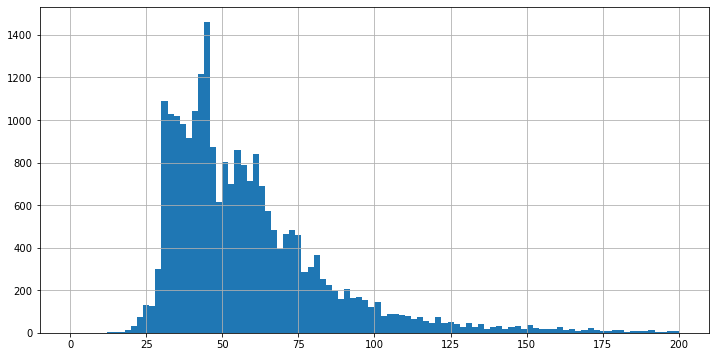

In [124]:
data['total_area'].hist(bins=100, range=(0,200), figsize=(12,6))

#### –í—ã–≤–æ–¥

–ò–∑ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –≤–∏–¥–Ω–æ, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –ø–ª–æ—â–∞–¥—å—é –æ—Ç 30 –¥–æ 60 –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã—Ö –º–µ—Ç—Ä–æ–≤. –°–∞–º—ã–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –∫–≤–∞—Ä—Ç–∏—Ä—ã –ø–ª–æ—â–∞–¥—å—é 45 –∫–≤.–º.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –ø–æ –ø–ª–æ—â–∞–¥—è–º –±–ª–∏–∑–∫–æ –∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –ü—É–∞—Å—Å–æ–Ω–∞.

### –¶–µ–Ω–∞

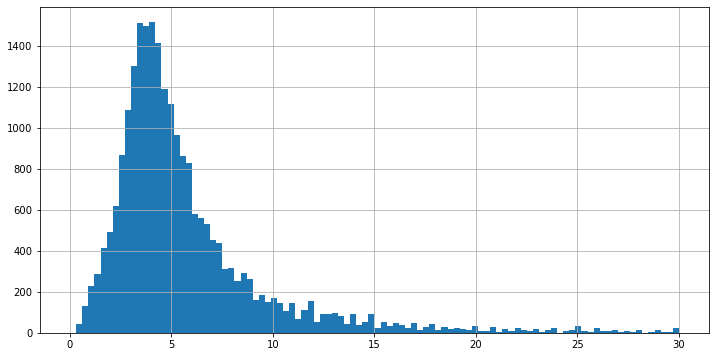

In [125]:
price_hist = data['last_price'].hist(bins=100, range=(0.01,30), figsize=(12,6), grid= True)


#### –í—ã–≤–æ–¥

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–Ω –Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Ç–∞–∫–∂–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é –ü—É–∞—Å—Å–æ–Ω–∞. 
–û—Å–Ω–æ–≤–Ω–æ–π –ø–∏–∫ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ 3,5-4–º–ª–Ω —Ä—É–±–ª–µ–π, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–∂–∏–¥–∞–Ω–∏—é. –ö–≤–∞—Ä—Ç–∏—Ä—ã –¥–æ—Ä–æ–∂–µ 8 –º–∏–ª–ª–∏–æ–Ω–æ–≤ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≥–æ—Ä–∞–∑–¥–æ —Ä–µ–∂–µ. 

### –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–æ–º–Ω–∞—Ç

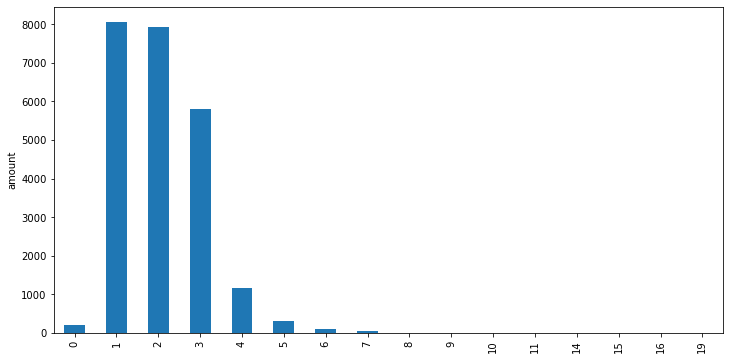

In [126]:
rooms_hist = data['rooms'].value_counts().sort_index().plot(kind='bar',figsize=(12,6), ylabel='amount')

#### –í—ã–≤–æ–¥ 

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –æ—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –æ–±—ä—è–≤–ª–µ–Ω–∏–π –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ 1, 2 –∏ 3 –∫–æ–º–Ω–∞—Ç–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã, —á—Ç–æ —Ç–∞–∫ –∂–µ –≤–ø–æ–ª–Ω–µ –æ–∂–∏–¥–∞–µ–º–æ.

### –í—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤

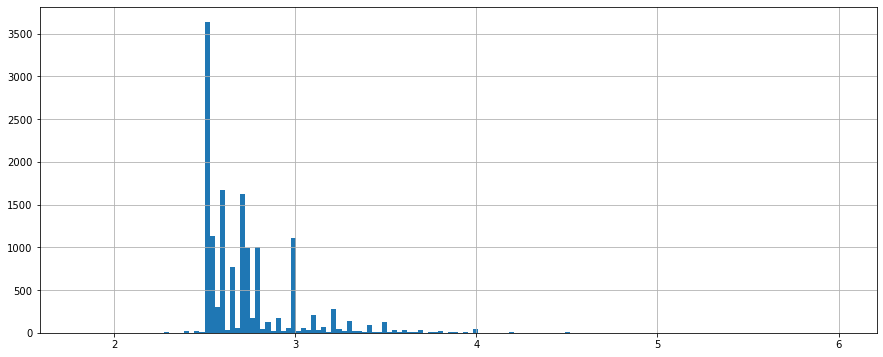

In [127]:
ceiling_hist = data['ceiling_height'].hist(bins=150,  figsize=(15,6), range=(1.8, 6))

In [128]:
data['ceiling_height'].value_counts()

2.50    3522
2.60    1647
2.70    1582
3.00    1110
2.80     992
        ... 
3.43       1
4.30       1
3.39       1
4.65       1
3.59       1
Name: ceiling_height, Length: 164, dtype: int64

#### –í—ã–≤–æ–¥

–° –≤—ã—Å–æ—Ç–æ–π –ø–æ—Ç–æ–ª–∫–æ–≤ —Ç–æ–∂–µ –Ω–∏–∫–∞–∫–∏—Ö —Å—é—Ä–ø—Ä–∏–∑–æ–≤ - –æ—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –∏–º–µ—é—Ç –ø–æ—Ç–æ–ª–∫–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–π –≤—ã—Å–æ—Ç—ã 2.5 –º–µ—Ç—Ä–∞. –ß—É—Ç—å —Ä–µ–∂–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å –≤—ã—Å–æ—Ç–æ–π, –≤—ã—Ä—å–∏—Ä—É—é—â–µ–π—Å—è –æ—Ç 2.5 –¥–æ 3 –º–µ—Ç—Ä–æ–≤. –ü–æ—Ç–æ–ª–∫–∏ –≤—ã—Å–æ—Ç–æ–π –æ—Ç 3 –¥–æ 4 –º–µ—Ç—Ä–æ–≤ –º–æ–≥—É—Ç –±—ã—Ç—å –ø—Ä–∏—Å—É—â–µ —Å—Ç–∞—Ä–æ–º—É —Ñ–æ–Ω–¥—É –∏ –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã–º –∫–≤–∞—Ä—Ç–∏—Ä–∞–º. 

### –°—Ä–æ–∫–∏ –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä

–ü–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–≤–∞—Ä—Ç–∏—Ä –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Å—Ä–æ–∫–∞ –ø—Ä–æ–¥–∞–∂–∏ –≤ –¥–Ω—è—Ö.

In [129]:
data['days_exposition'].value_counts().head(20)

180    3219
45      879
60      538
7       234
30      208
90      204
4       176
3       158
5       152
14      148
9       143
20      139
8       139
44      138
11      135
18      128
13      128
10      127
28      126
15      126
Name: days_exposition, dtype: int64

–†–∞–∑–¥–µ–ª–∏–º –ø–æ–ª—É—á–µ–Ω—ã–π —Å–ø–∏—Å–æ–∫ –Ω–∞ –ø–æ–¥–≥—Ä—É–ø–ø—ã –ø–æ –Ω–µ–¥–µ–ª—è–º, –º–µ—Å—è—Ü–∞–º –∏ –∫–≤–∞—Ä—Ç–∞–ª–∞–º.

In [130]:
def sell_time (days):
    if 0 < days <= 7:
        return '0. week'
    if 7 < days <= 14:
        return '1. two weeks'
    if 14 < days <= 30:
        return '2. month'
    if 30 < days <= 60:
        return '3. two month'
    if 60 < days <= 90:
        return '4. quarter'
    if 90 < days <= 180:
        return '5. half a year'    
    if 180 < days <= 240:
        return '6. three quartals'
    if 270 < days <= 360:
        return '7. year'
    if 360 < days <= 540:
        return '8. year and a half'
    if 540 < days :
        return '9. two years'  


–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –ø–æ –≥—Ä—É–ø–ø–∞–º.

<AxesSubplot:ylabel='amount'>

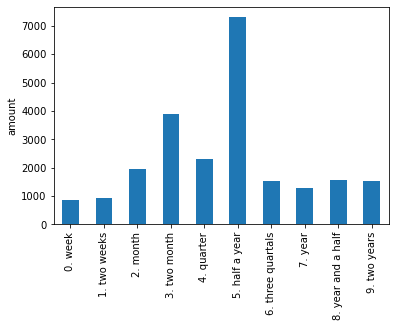

In [131]:
data['days_exposition'].apply(sell_time).value_counts().sort_index().plot(kind='bar', ylabel='amount')

–¢–∞–∫–∂–µ —Ä–∞—Å—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∏ –º–µ–¥–∏–∞–Ω–Ω–æ–µ –≤—Ä–µ–º—è –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä –ø–æ –≤—Å–µ–º—É –¥–∞—Ç–∞—Å–µ—Ç—É. –°–≤–µ—Ä–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Å –≥—Ä–∞—Ñ–∏–∫–æ–º.

In [132]:
sell_time_mean = data['days_exposition'].mean()
print(sell_time_mean)
sell_time_median = data['days_exposition'].median()
print(sell_time_median)

180.55540529118417
124.0


In [133]:
data['days_exposition'].describe([.1,.5,.90])

count    23662.000000
mean       180.555405
std        204.291175
min          1.000000
10%         19.000000
50%        124.000000
90%        425.000000
max       1580.000000
Name: days_exposition, dtype: float64

(-30.0, 700.0)

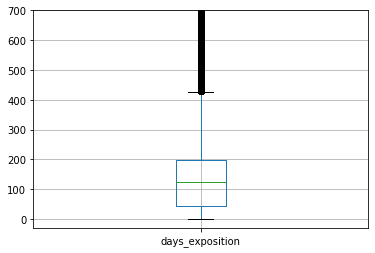

In [134]:


data[['days_exposition']].boxplot()
plt.ylim(-30, 700)

–û–±—ä—è–≤–ª–µ–Ω—è —Å—Ä–æ–∫–æ–º –±–æ–ª—å—à–µ 425 –¥–Ω–µ–π –æ—á–µ–Ω—å —Ä–µ–¥–∫–∏ –∏ –∏—Ö –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –≤—ã–±—Ä–æ—Å–∞–º–∏. –ü—Ä–æ–≤–µ—Ä–∏–º, –∫–∞–∫—É—é –¥–æ–ª—é –∑–∞–Ω–∏–º–∞—é—Ç –≤—ã–±—Ä–æ—Å—ã –∏–∑ –≤—Å–µ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞.

In [135]:
data = data.loc[data['days_exposition']<(data['days_exposition'].describe([.1,.5,.90])['90%'])]

#### –í—ã–≤–æ–¥

–ú–µ–¥–∏–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è —Å—Ä–æ–∫–∞ –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä —Ä–∞–≤–Ω—è–µ—Ç—Å—è 124 –¥–Ω—è–º, —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç 4 –º–µ—Å—è—Ü–∞–º. –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ - 180 –¥–Ω–µ–π, —Ç–æ –µ—Å—Ç—å –ø–æ–ª–≥–æ–¥–∞.

–ß–∞—â–µ –≤—Å–µ–≥–æ –æ—Ç –ø–æ–¥–∞—á–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è –¥–æ –ø—Ä–æ–¥–∞–∂–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã —É—Ö–æ–¥–∏—Ç –æ—Ç 2 –¥–æ 6 –º–µ—Å—è—Ü–µ–≤. 
–ú–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –∫–≤–∞—Ä—Ç–∏—Ä–∞ –ø—Ä–æ–¥–∞–ª–∞—Å—å –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ, –µ—Å–ª–∏ —Å –ø–æ–º–µ–Ω—Ç–∞ –ø–æ–¥–∞–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è –ø—Ä–æ—à–ª–æ –º–µ–Ω—å—à–µ 2 –º–µ—Å—è—Ü–µ–≤. 
–ò —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –µ—Å–ª–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏–µ –≤–∏—Å–∏—Ç –±–æ–ª—å—à–µ –ø–æ–ª—É–≥–æ–¥–∞, —Ç–æ —â–∞–Ω—Å—ã –Ω–∞ –ø—Ä–æ–¥–∞–∂—É –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–º–µ–Ω—å—à–∞—é—Ç—Å—è.

### –ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤

#### –ü–ª–æ—â–∞–¥—å –∫–≤–∞—Ä—Ç–∏—Ä—ã

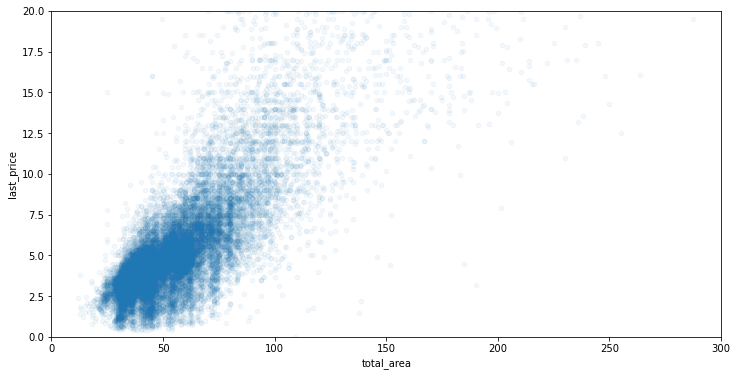

In [136]:
area_plot = data.plot(kind='scatter', 
          x='total_area',y='last_price', 
          xlim=(0,300), ylim=(0,20),
          alpha=0.05, figsize=(12,6)
         )

##### –í—ã–≤–æ–¥ 

–°–∞–º—ã–º–∏ —Ä–∞—Å–ø—Ä–æ—Å—Ç—Ä–∞–Ω–µ–Ω–Ω—ã–º–∏ —è–≤–ª—è—é—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç 25 –¥–æ 70 –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã—Ö –º–µ—Ç—Ä–æ–≤ –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –æ—Ç 1.5 –¥–æ 6 –º–∏–ª–ª–∏–æ–Ω–æ–≤ —Ä—É–±–ª–µ–π.
–¢–∞–∫ –∂–µ –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–∞ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –±–ª–∏–∑–∫–∞—è –∫ –ª–∏–Ω–µ–π–Ω–æ–π (—Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å—é).

#### –ö–æ–º–Ω–∞—Ç—ã

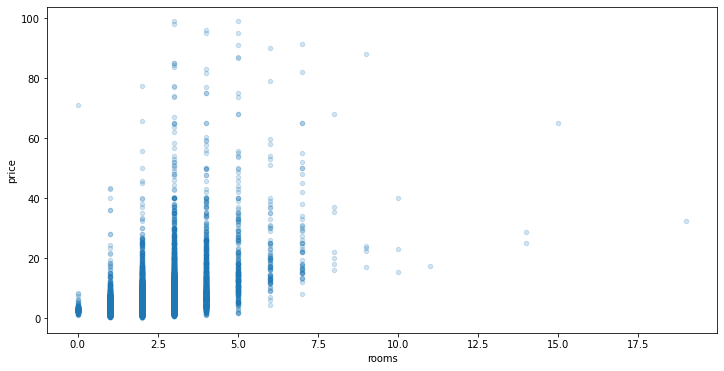

In [137]:
rooms_cost_scatter = \
data.plot(kind='scatter',x='rooms',y='last_price', ylabel='price', figsize = (12,6), alpha = 0.2)

In [138]:
data['rooms'].value_counts()

1     7352
2     7210
3     5134
4      992
5      260
0      187
6       82
7       50
8        7
9        5
10       3
14       2
11       1
15       1
19       1
Name: rooms, dtype: int64

##### –í—ã–≤–æ–¥ 

–ò–∑ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ –≥—Ä–∞—Ñ–∏–∫–∞ –º—ã –≤–∏–¥–∏–º, —á—Ç–æ —Å—Ç—É–¥–∏–π –¥–æ—Ä–æ–∂–µ 10 –º–∏–ª–ª–∏–æ–Ω–æ–≤ –Ω–µ –±—ã–≤–∞–µ—Ç, —Ç–∞–∫ –∂–µ –∫–∞–∫ –∏ –¥–µ—à–µ–≤—ã—Ö 7-8 –∫–æ–º–Ω–∞—Ç–Ω—ã—Ö. 

–° —Ä–æ—Å—Ç–æ–º —á–∏—Å–∞ –∫–æ–º–Ω–∞—Ç —Å—Ç–æ–∏–º–æ—Ç—å —Ä–∞—Å—Ç–µ—Ç, –Ω–æ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –Ω–µ –ª–∏–Ω–µ–π–Ω–∞—è.  

#### –†–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ

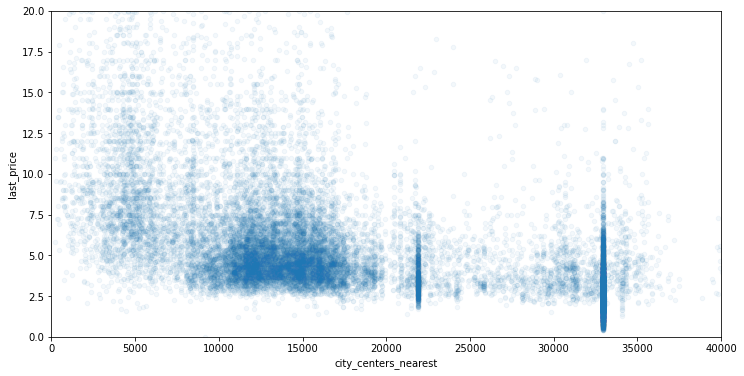

In [139]:
distance_price_hist = data.plot(kind='scatter', 
          x='city_centers_nearest',y='last_price', 
          xlim=(0,40000), ylim=(0,20),
          alpha=0.05, figsize=(12,6)
         )

##### –í—ã–≤–æ–¥ 

–ù–∞ –≥—Ä–∞—Ñ–∏–∫–µ –≤–∏–¥–Ω—ã –ø–æ–ª–æ—Å—ã –≤ —Ä–∞–π–æ–Ω–µ 22 –∏ 33 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤. –≠—Ç–∏ –∞–Ω–æ–º–∞–ª–∏–∏ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∏—Å—å –≤—Å–ª–µ–¥—Å—Ç–≤–∏–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –ø—Ä–æ–ø—É—Å–∫–æ–≤ –º–µ–¥–∏–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏, –∞ —Ç–∞–∫ –∂–µ –∑–∞–ø–æ–ª–Ω–µ–Ω–∏—è –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –æ –ø–æ—Å–µ–ª–∫–∞—Ö –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–æ–º.

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ —Ä–∞–∑–∏—É—Å–µ –æ—Ç 10 –¥–æ 20 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞. –≠—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∑–∞—Å—Ç—Ä–æ–π–∫–µ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö —Ä–∞–π–æ–Ω–æ–≤ –≥–æ—Ä–æ–¥–∞ –º–Ω–æ–≥–æ–∫–≤–∞—Ä—Ç–∏—Ä–Ω—ã–º–∏ –¥–æ–º–∞–º–∏. –ö–≤–∞—Ä—Ç–∏—Ä—ã –≤ —Ç–∞–∫–∏—Ö —Ä–∞–π–æ–Ω–∞—Ö –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Å—Ç–æ—è—Ç –æ—Ç 3 –¥–æ 6 –º–∏–ª–ª–∏–æ–Ω–æ–≤.

–¢–∞–∫ –∂–µ –∏–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –∑–∞–º–µ—Ç–Ω–∞ –º–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –ø–æ—Ä–æ–≥–æ–≤–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –≤ –ø–µ—Ç–µ—Ä–±—É—Ä–≥–µ - 2.5 –º–∏–ª–ª–∏–æ–Ω–∞ —Ä—É–±–ª–µ–π.

–û—Å–Ω–æ–≤–Ω–∞—è —á–∞—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –≤ —Ü–µ–Ω—Ç—Ä–µ –≥–æ—Ä–æ–¥–∞, –≤ —Ä–∞–¥–∏—É—Å–µ –¥–æ 8 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤, –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç—Å—è –æ—Ç 5 –¥–æ 10 –º–∏–ª–ª–∏–æ–Ω–æ–≤ —Ä—É–±–ª–µ–π.

#### –≠—Ç–∞–∂

(4.5, 6.5)

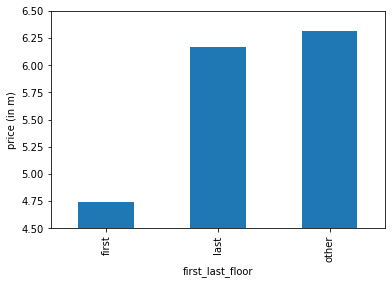

In [140]:
floor_price_hist = data.groupby(by='first_last_floor')['last_price'].mean().plot(kind='bar',ylabel='price (in m)')
plt.ylim(4.5, 6.5)


–°–æ–≥–ª–∞—Å–Ω–æ –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É, —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –ø–æ—Å–ª–µ–¥–Ω–∏–º–∏ –∏ –Ω–µ –ø–µ—Ä–≤—ã–º–∏ —ç—Ç–∞–∂–∞–º–∏ –Ω–µ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–∞.
–¢–æ–≥–¥–∞ –∫–∞–∫ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–∂–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –ø—Ä–æ—Å–µ–¥–∞—é—Ç –ø–æ —Ü–µ–Ω–µ, –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö –∫–≤–∞—Ä—Ç–∏—Ä. 
–ù–æ —ç—Ç–æ –º–æ–∂–Ω–æ –æ–±—ä—è—Å–Ω–∏—Ç—å —Ç–∞–∫ –∂–µ —Ç–µ–º, —á—Ç–æ –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –Ω–æ–≤–æ—Å—Ç—Ä–æ–π–∫–∏ –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Å–µ–π—á–∞—Å –ø—Ä–æ–µ–∫—Ç–∏—Ä—É—é—Ç—Å—è —Å –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–º–∏ –ø–æ–º–µ—â–µ–Ω–∏—è–º–∏ –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–∂–∞—Ö. –°–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–∂–∞—Ö –≤–Ω—É—Ç—Ä–∏ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –º–µ–Ω—å—à–µ, —á–µ–º –≤ –ø–æ—Å–µ–ª–∫–∞—Ö. 

–ü—Ä–æ–≤–µ—Ä–∏–º —ç—Ç—É –≥–∏–ø–æ—Ç–µ–∑—É –Ω–∏–∂–µ. –ü–æ—Å—á–∏—Ç–∞–µ–º –¥–æ–ª—é –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–∂–∞—Ö –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Å–µ—Ö –∫–≤–∞—Ä—Ç–∏—Ä –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –∏ –µ–≥–æ –ø—Ä–∏–≥–æ—Ä–æ–¥–æ–≤, –∏ –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è —Ä–µ–≥–∏–æ–Ω–∞.

In [141]:
first_floor_spb_ratio = (len(data.query("city_centers_nearest < 23000 and first_last_floor == 'first' ")) / 
            len(data.query("city_centers_nearest < 23000")))
first_floor_spb_ratio

0.09593528546597138

In [142]:
first_floor_region_ratio = (len(data.query("city_centers_nearest > 23000 and first_last_floor == 'first' ")) / 
            len(data.query("city_centers_nearest > 23000 ")))
first_floor_region_ratio

0.18154526781482067

–ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å, –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –≤ –¥–≤–∞ —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–∂–∞—Ö, —á–µ–º –≤ –æ—Ç–¥–∞–ª–µ–Ω–Ω—ã—Ö –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö.

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –æ—Ç–¥–µ–ª—å–Ω–æ –¥–ª—è –∫–≤–∞—Ä—Ç–∏—Ä –≤ –æ–ª–ª–∞—Å—Ç–∏ –∏ –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ.

(5.0, 8.5)

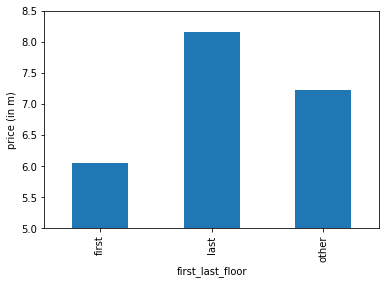

In [143]:
floor_price_spb_hist = data.query("city_centers_nearest < 23000").groupby(by='first_last_floor')['last_price'].mean().plot(kind='bar',ylabel='price (in m)')
plt.ylim(5, 8.5)

(3.0, 3.8)

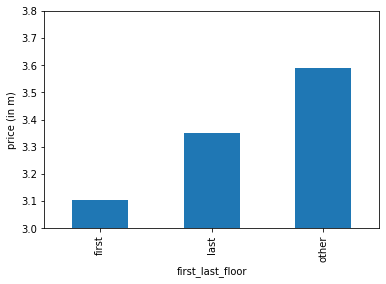

In [144]:
floor_price_region_hist = data.query("city_centers_nearest > 23000").groupby(by='first_last_floor')['last_price'].mean().plot(kind='bar',ylabel='price (in m)')
plt.ylim(3, 3.8)

##### –í—ã–≤–æ–¥ 

–ò –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –∏ –≤ –õ–µ–Ω–æ–±–ª–∞—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–∂–∞—Ö –æ—Ü–µ–Ω–∏–≤–∞—é—Ç—Å—è –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.
–¢–∞–∫–∂–µ –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –≥–æ—Ä–∞–∑–¥–æ –±–æ–ª—å—à–µ —Ü–µ–Ω—è—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö, –≤–µ—Ä–æ—è—Ç–Ω–æ, –æ–Ω–∏ —Ä–∞—Å—Ü–µ–Ω–∏–≤–∞—é—Ç—Å—è –∫–∞–∫ –≤–∏–¥–æ–≤—ã–µ –∏–ª–∏ –ø–µ–Ω—Ç—Ö–∞—É—Å—ã. –¢–æ–≥–¥–∞ –∫–∞–∫ –≤ –æ–±–ª–∞—Å—Ç–∏ –ø–æ—Å–ª–µ–¥–Ω–∏–µ —ç—Ç–∞–∂–∏ –æ—Ü–µ–Ω–∏–≤–∞—é—Ç—Å—è –Ω–∏–∂–µ –æ—Å—Ç–∞–ª—å–Ω—ã—Ö.

#### –î–∞—Ç–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è

(5.5, 6.5)

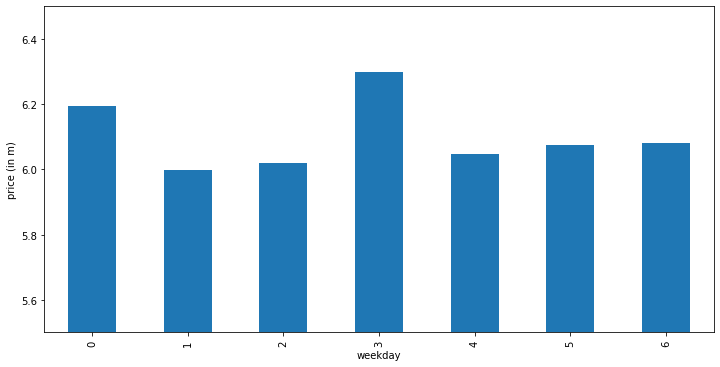

In [145]:
publish_weekday_count = data.groupby(by='weekday')['last_price'].mean().plot(kind='bar',ylabel='price (in m)', figsize=(12,6))
plt.ylim(5.5, 6.5)

(1500.0, 4000.0)

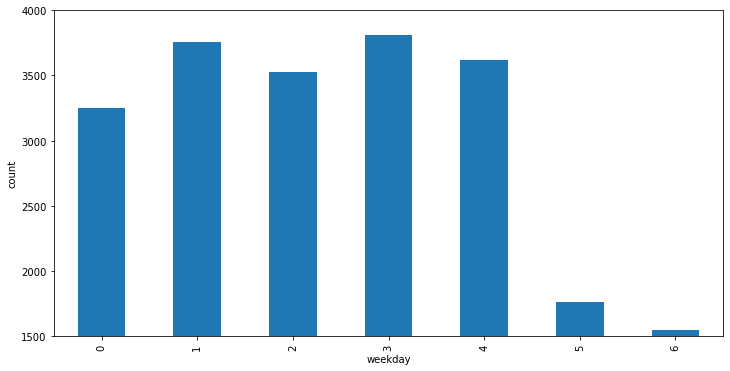

In [146]:
publish_weekday_mean_price = data.groupby(by='weekday')['last_price'].count().plot(kind='bar',ylabel='count', figsize=(12,6))
plt.ylim(1500, 4000)

(5.5, 6.5)

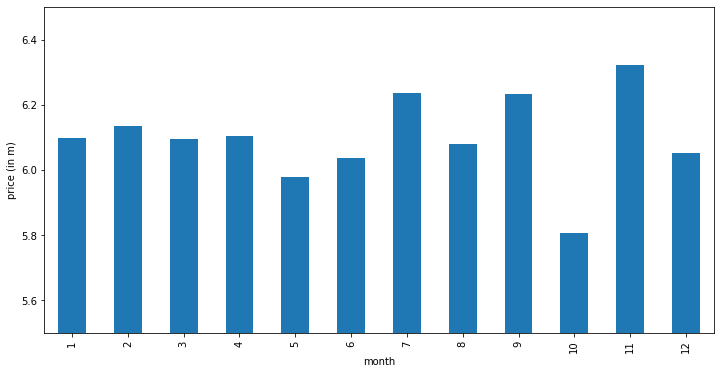

In [147]:
publish_month_mean_price = data.groupby(by='month')['last_price'].mean().plot(kind='bar', ylabel='price (in m)', figsize=(12,6))
plt.ylim(5.5, 6.5)

(800.0, 2500.0)

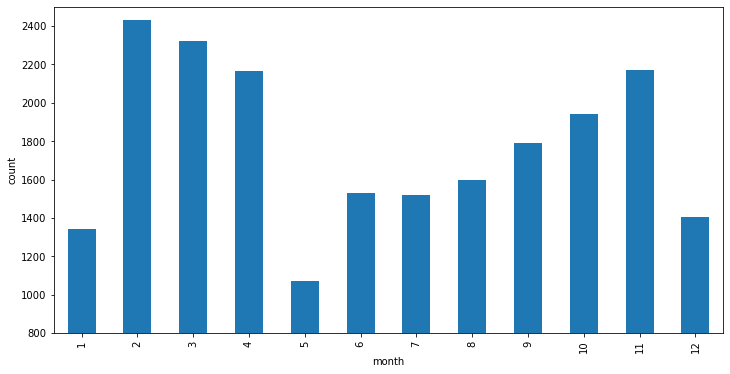

In [148]:
publish_month_count = data.groupby(by='month')['last_price'].count().plot(kind='bar', ylabel='count', figsize=(12,6))
plt.ylim(800, 2500)

(5.5, 18.0)

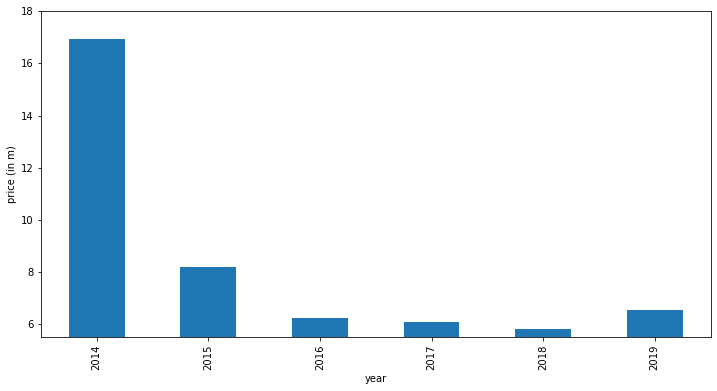

In [149]:
publish_year_mean_price  = data.groupby(by='year')['last_price'].mean().plot(kind='bar',ylabel='price (in m)', figsize=(12,6))
plt.ylim(5.5, 18)

(-100.0, 9000.0)

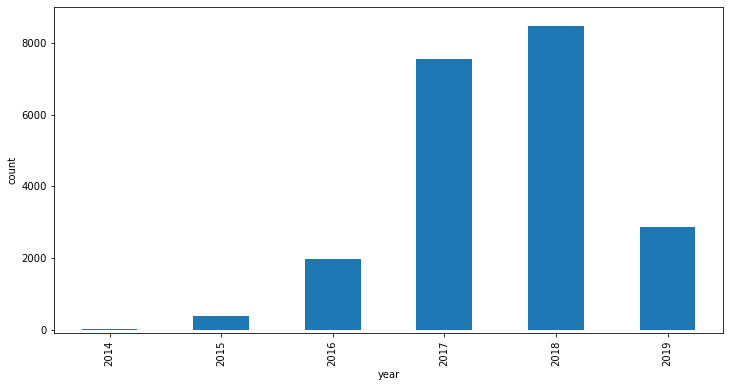

In [150]:
publish_year_count = data.groupby(by='year')['last_price'].count().plot(kind='bar',ylabel='count', figsize=(12,6))
plt.ylim(-100, 9000)

<AxesSubplot:xlabel='year', ylabel='price'>

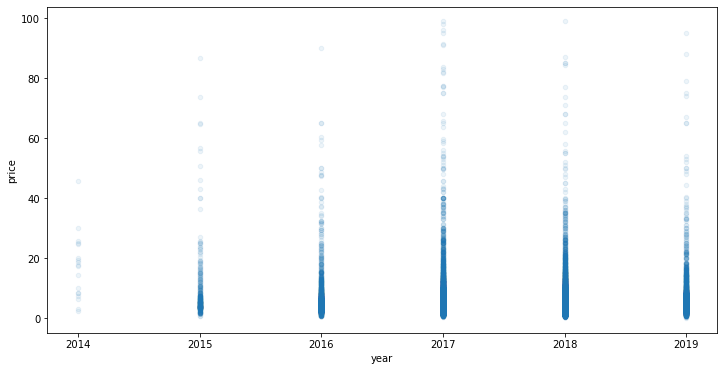

In [151]:
data.plot(kind='scatter',x='year',y='last_price', ylabel='price', figsize = (12,6), alpha = 0.08)

<AxesSubplot:xlabel='first_day_exposition', ylabel='price'>

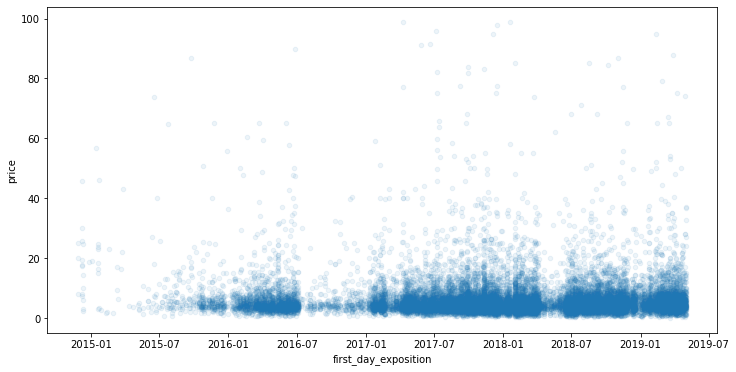

In [152]:
data.plot(kind='scatter',x='first_day_exposition',y='last_price', ylabel='price', figsize = (12,6), alpha = 0.08)

In [153]:
data[['last_price','total_area','rooms','city_centers_nearest','year']].corr()

last_price  total_area     rooms  city_centers_nearest  \
last_price              1.000000    0.768946  0.471166             -0.394498   
total_area              0.768946    1.000000  0.764840             -0.252441   
rooms                   0.471166    0.764840  1.000000             -0.175977   
city_centers_nearest   -0.394498   -0.252441 -0.175977              1.000000   
year                   -0.019392   -0.044927 -0.022852              0.030758   

                          year  
last_price           -0.019392  
total_area           -0.044927  
rooms                -0.022852  
city_centers_nearest  0.030758  
year                  1.000000

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>üéì <font color="SteelBlue">–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π –æ—Ç —Å—Ç—É–¥–µ–Ω—Ç–∞ (—Å–∏–Ω–∏–π)</font></h5>    

–î–æ–±–∞–≤–∏–ª–∞ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—é –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π
    
</div>

–ú–µ–∂–¥—É –ø–ª–æ—â–∞–¥—å—é –∫–≤–∞—Ä—Ç–∏—Ä—ã –∏ —Ü–µ–Ω–æ–π, –∞ —Ç–∞–∫ –∂–µ –º–µ–∂–¥—É –ø–ª–æ—â–∞–¥—å—é –∏ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç, –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –≤—ã—Å–æ–∫–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è. 
–ù–æ –ø—Ä–∏ —ç—Ç–æ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –Ω–∞–ø—Ä—è–º—É—é –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç –∏ —Ü–µ–Ω–æ–π —Å–ª–∞–±–∞—è. 

–ó–ê–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç —É–¥–∞–ª–µ–Ω–Ω–æ—Å—Ç–∏ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ —Ç–∞–∫ –∂–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç, –Ω–æ —Å–ª–∞–±–æ.

 #####  –í—ã–≤–æ–¥ 
 –ì—Ä–∞—Ñ–∏–∫–∏ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —á—Ç–æ —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –¥–Ω—è –∏–ª–∏ –º–µ—Å—è—Ü–∞ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è. 
 
 –ê –≤–æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–º–µ—â–µ–Ω–Ω—ã—Ö –æ–±—ä—è–≤–ª–µ–Ω–∏–π –≤–∞—Ä—å–∏—Ä—É—Ç–µ—Å—è. –í –≤—ã—Ö–æ–¥–Ω—ã–µ –¥–Ω–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –ø—É–±–ª–∏–∫—É–µ—Ç—Å—è –≤ –¥–≤–∞ —Ä–∞–∑–∞ –º–µ–Ω—å—à–µ, —á–µ–º –≤ –±—É–¥–Ω–∏. 
 –°–∞–º—ã–º–∏ –∞–∫—Ç–∏–≤–Ω—ã–º–∏ –¥–ª—è —Ä–∏–µ–ª—Ç–æ—Ä–æ–≤ —è–≤–ª—è—é—Ç—Å—è –≤–µ—Å–µ–Ω–Ω–∏–µ –∏ –æ—Å–µ–Ω–Ω–∏–µ –º–µ—Å—è—Ü—ã. –ù–∞ –ª–µ—Ç–Ω–∏–µ –º–µ—Å—è—Ü—ã –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –ø–µ—Ä–∏–æ–¥ –æ—Ç–ø—É—Å–∫–æ–≤ –∏ –¥–∞—á, –ø–æ—ç—Ç–æ–º—É –≤ —ç—Ç–æ –≤—Ä–µ–º—è –æ–±—ä—è–≤–ª–µ–Ω–∏–π –º–µ–Ω—å—à–µ. –¢–∞–∫ –∂–µ —Ç–∏—Ö–∏–º–∏ –¥–ª—è —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –º–µ—Å—è—Ü–∞–º–∏ —è–≤–ª—è—é—Ç—Å—è –¥–µ–∫–∞–±—Ä—å, —è–Ω–≤–∞—Ä—å –∏ –º–∞–π, –∏–∑-–∑–∞ –æ–±–∏–ª–∏—è –ø—Ä–∞–∑–¥–Ω–∏—á–Ω—ã—Ö –¥–Ω–µ–π.
 
 –ß—Ç–æ –∫–∞—Å–∞–µ—Ç—Å—Å—è –≥–æ–¥–∞ –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä, —Å–∞–º—ã–º–∏ —Ç—Ä—É–¥–Ω—ã–º–∏ –¥–ª—è —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –±—ã–ª–∏ 2015 –∏ 2016 –≥–æ–¥–∞, –∫–∞–∫ –ø–æ—Å–¥–µ–¥—Å—Ç–≤–∏–µ –∫—Ä–∏–∑–∏—Å–∞ 2014 –≥–æ–¥–∞ –∏ –ø–∞–¥–µ–Ω–∏—è –∫—É—Ä—Å–∞ —Ä—É–±–ª—è –∏ –ø–æ–∫—É–ø–∞—Ç–µ–ª—å–Ω–æ–π —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ —Ä–æ—Å—Å–∏—è–Ω. –ü—Ä–∏ —ç—Ç–æ–º —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –≤ 2014 –±—ã–ª–∞ —Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π –≤ –∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º–æ–º –ø–µ—Ä–∏–æ–¥–µ. –ù–æ –¥–∞–Ω–Ω—ã—Ö –∑–∞ 2014 –≥–æ–¥ —Å–ª–∏—à–∫–æ–º –º–∞–ª–æ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã —Å–¥–µ–ª–∞—Ç—å –∫–æ–º–ø–ª–µ–∫—Å–Ω—ã–π –≤—ã–≤–æ–¥.

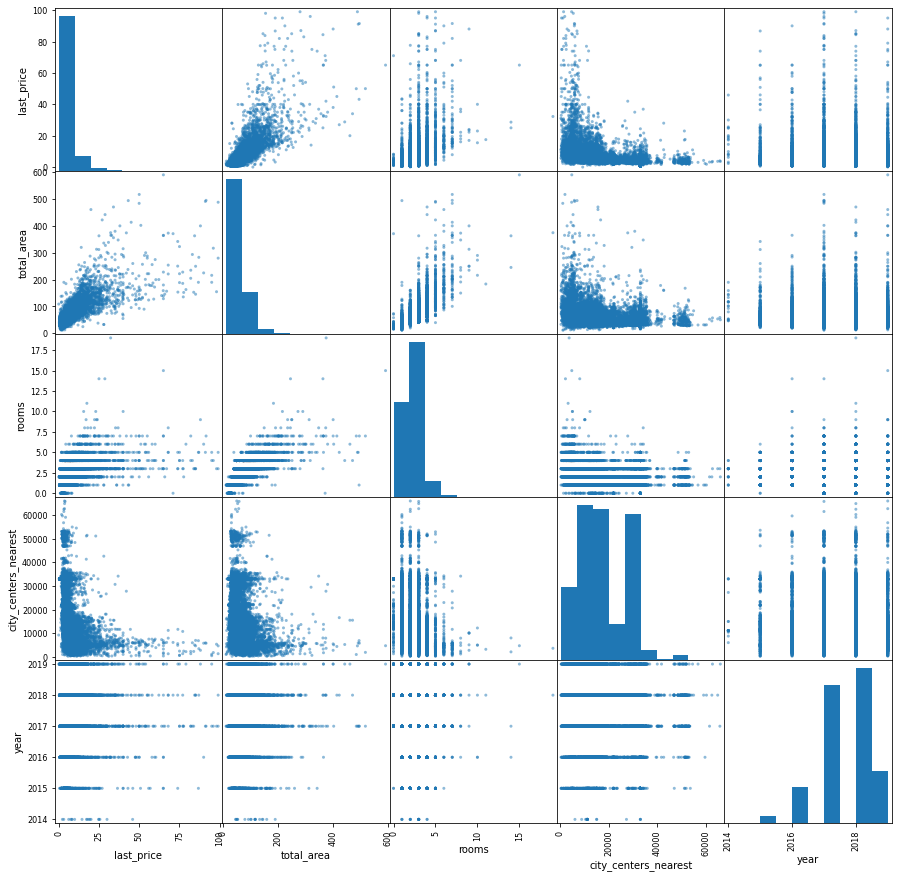

In [154]:
matrix_plot = pd.plotting.scatter_matrix(data[['last_price','total_area','rooms','city_centers_nearest','year']],figsize=(15,15))

### –ö–≤–∞—Ä—Ç–∏—Ä—ã –≤ –æ–±–ª–∞—Å—Ç–∏

In [155]:
large_villages_list = list(data.loc[data['locality_name']!='–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥'].groupby('locality_name')['is_apartment'].count().sort_values().tail(10).index)

In [156]:
large_villages = data.query("locality_name in @large_villages_list")
large_villages.groupby('locality_name')['sq_m_price'].mean().sort_values()

locality_name
–í—ã–±–æ—Ä–≥         58.229343
–í—Å–µ–≤–æ–ª–æ–∂—Å–∫     68.960702
–ì–∞—Ç—á–∏–Ω–∞        69.001245
–ö–æ–ª–ø–∏–Ω–æ        75.381551
–®—É—à–∞—Ä—ã         78.803975
–ü–µ—Ç–µ—Ä–≥–æ—Ñ       84.738857
–ú—É—Ä–∏–Ω–æ         86.372018
–ü–∞—Ä–≥–æ–ª–æ–≤–æ      89.746000
–ö—É–¥—Ä–æ–≤–æ        95.636986
–ü—É—à–∫–∏–Ω        102.843814
Name: sq_m_price, dtype: float64

(50.0, 110.0)

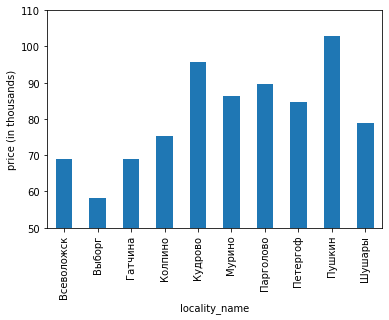

In [157]:
large_villages.groupby('locality_name')['sq_m_price'].mean().plot(kind='bar', ylabel='price (in thousands)')
plt.ylim(50, 110)

(4.0, 6.0)

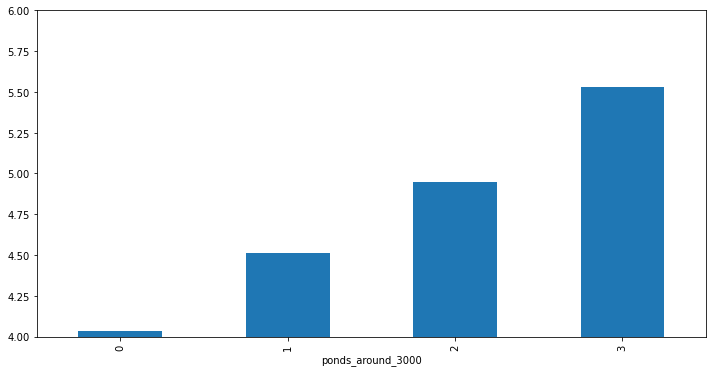

In [158]:
large_villages.groupby('ponds_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(4,6)

(3.8, 6.3)

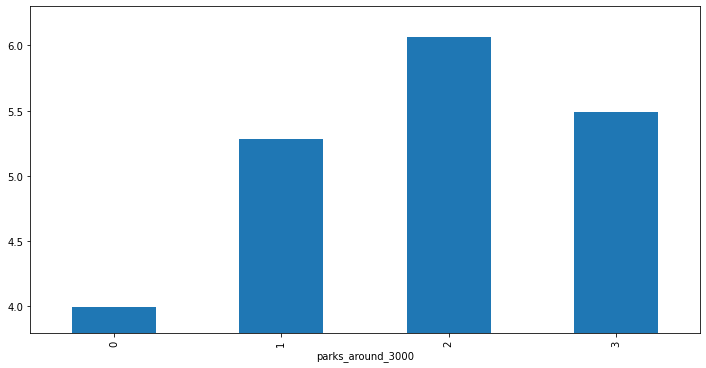

In [159]:
large_villages.groupby('parks_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(3.8,6.3)

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞–ª–∏—á–∏–µ –ø–∞—Ä–∫–æ–≤ –≤ —Ä–∞–¥–∏—É—Å–µ 3–∫–º –≤–ª–∏—è–µ—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Ç—å –∂–∏–ª—å—è. 

–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–µ–º, –Ω–∞ —Å–∫–æ–ª—å–∫–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –∫–∞–∂–¥—ã–π –ø–∞—Ä–∫ –ø–æ–≤—ã—à–∞–µ—Ç —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã.

In [160]:
diff=[]
mean_cost_parks = large_villages.groupby('parks_around_3000')['last_price'].mean()
mean_cost_parks
for i in range(len(mean_cost_parks)-1):
    diff.append(mean_cost_parks[i+1]-mean_cost_parks[i])
parks_mean_increase_village = sum(diff)/len(diff)
parks_mean_increase_village

0.4990401200944155

–ò –ø—Ä–æ–¥–µ–ª–∞–µ–º —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –ø—Ä—É–¥–æ–≤

In [161]:
diff=[]
mean_cost_ponds = large_villages.groupby('ponds_around_3000')['last_price'].mean()
mean_cost_ponds
for i in range(len(mean_cost_ponds)-1):
    diff.append(mean_cost_ponds[i+1]-mean_cost_ponds[i])
ponds_mean_increase_village = sum(diff)/len(diff)
ponds_mean_increase_village

0.4988098503966573

–ü–æ—Å–º–æ—Ç—Ä–∏–º, —Å–∫–æ–ª—å–∫–æ —ç—Ç–æ –æ—Ç —Å—Ä–µ–¥–Ω–µ–π —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –ø–æ –æ–±–ª–∞—Å—Ç–∏.

In [162]:
print((parks_mean_increase_village / large_villages['last_price'].mean()).round(2)*100)
print((ponds_mean_increase_village / large_villages['last_price'].mean()).round(2)*100)

12.0
12.0


#### –í—ã–≤–æ–¥

–°–∞–º—ã–º –¥–æ—Ä–æ–≥–∏–º –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã–º –ø—É–Ω–∫—Ç–æ–º –≤ –æ–±–ª–∞—Å—Ç–∏, —Å–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º, —è–≤–ª—è–µ—Ç—Å—è –ü—É—à–∫–∏–Ω. –ù–æ, —Ç–∞–∫ –∫–∞–∫ —é—Ä–∏–¥–∏—á–µ—Å–∫–∏ –ü—É—à–∫–∏–Ω –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤ —Å–æ—Å—Ç–∞–≤–µ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞, —Ç–æ —É –µ–≥–æ –∂–∏—Ç–µ–ª–µ–π –µ—Å—Ç—å –¥–æ—Å—Ç—É–ø –∫ —Å–æ—Ü–∏–∞–ª—å–Ω—ã–º –±–ª–∞–≥–∞–º –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞, —ç—Ç–æ –º–æ–∂–µ—Ç –æ–∫–∞–∑—ã–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è. 

–¢–æ–≥–¥–∞ –∫–∞–∫ –≤—Ç–æ—Ä–æ–π –ø–æ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∂–∏–ª—å—è –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã–π –ø—É–Ω–∫—Ç - –ö—É–¥—Ä–æ–≤–æ, –æ—Ç–Ω–æ—Å–∏—Ç—Å—è —É–∂–µ –∫ –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏. –ü–æ—ç—Ç–æ–º—É –ø—Ä–µ–¥–ª–∞–≥–∞—é —Å—á–∏—Ç–∞—Ç—å —Å–∞–º—ã–º –¥–æ—Ä–æ–≥–∏–º –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã–º –ø—É–Ω–∫—Ç–æ–º –∏–º–µ–Ω–Ω–æ –ö—É–¥—Ä–æ–≤–æ, –∞ –Ω–µ –ü—É—à–∫–∏–Ω.

–í –æ–±–ª–∞—Å—Ç–∏ –Ω–∞–ª–∏—á–∏–µ —Ä—è–¥–æ–º –ø–∞—Ä–∫–∞ –∏–ª–∏ –ø—Ä—É–¥–∞ –¥–æ–±–∞–≤–ª—è–µ—Ç –∫ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ —Å—Ä–µ–¥–Ω–µ–º 0.5–º–ª —Ä—É–±–ª–µ–π –∏–ª–∏ 12%.

### –ö–≤–∞—Ä—Ç–∏—Ä—ã –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ

In [163]:
spb_flats = data.query("locality_name == '–°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥'").copy()
spb_flats['city_centers_km'] = (spb_flats['city_centers_nearest'] / 1000).astype(int)

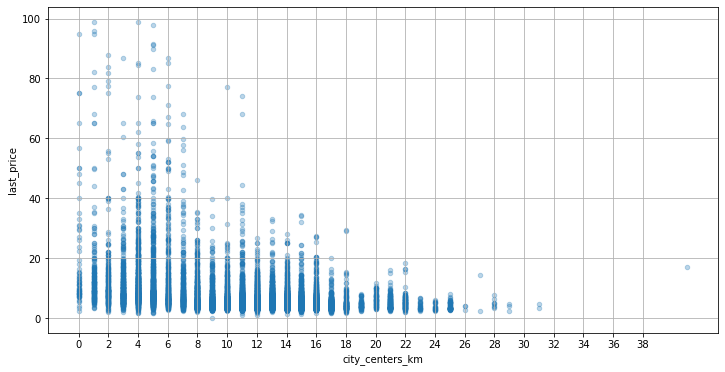

In [164]:
ax = spb_flats.plot(x='city_centers_km', y='last_price', kind='scatter', alpha=0.3, figsize=(12,6))
major_ticks = np.arange(0, 40, 2)

ax.set_xticks(major_ticks)
ax.grid(which='both')

In [165]:
spb_center_flats = spb_flats.query("city_centers_km <= 7 ").copy()
spb_center_flats[['total_area','last_price','rooms','ceiling_height']].describe()

total_area   last_price        rooms  ceiling_height
count  3112.000000  3112.000000  3112.000000     2014.000000
mean     88.474614    12.683246     2.753213        3.065134
std      53.603587    11.880419     1.415857        0.363081
min      12.000000     1.600000     0.000000        2.400000
25%      55.000000     6.500000     2.000000        2.800000
50%      75.950000     8.900000     3.000000        3.000000
75%     105.225000    13.800000     3.000000        3.250000
max     590.000000    99.000000    19.000000        5.800000

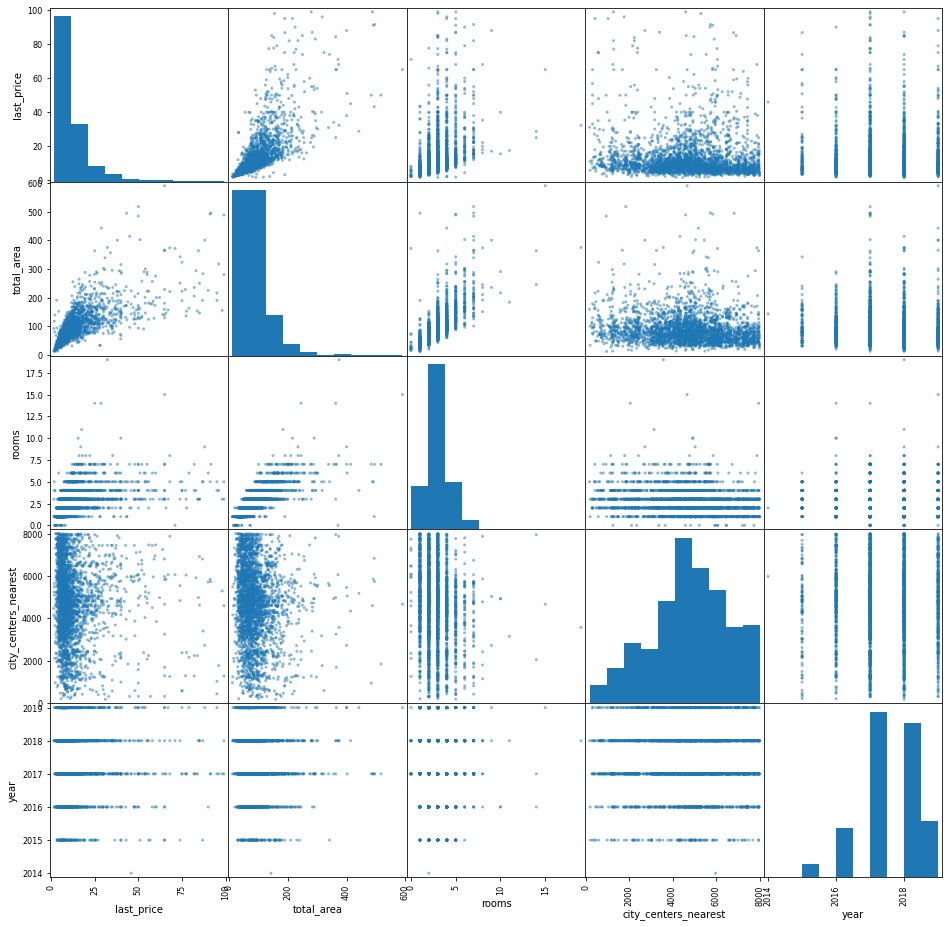

In [166]:
spb_matrix_plot = pd.plotting.scatter_matrix(spb_center_flats[['last_price','total_area','rooms','city_centers_nearest','year']],
                                             figsize=(16,16)
                                            )

(6.5, 13.0)

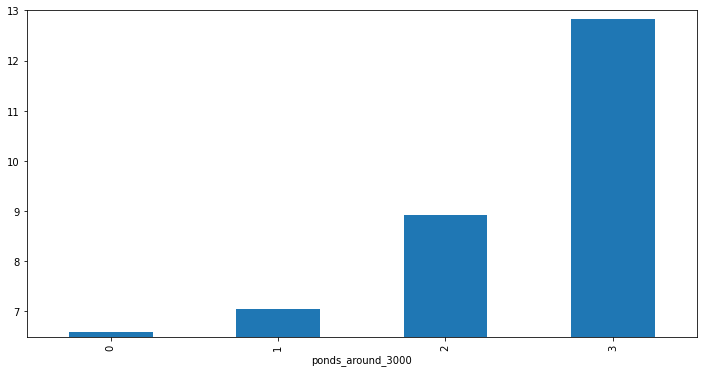

In [167]:
spb_flats.groupby('ponds_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(6.5,13)

(6.0, 15.0)

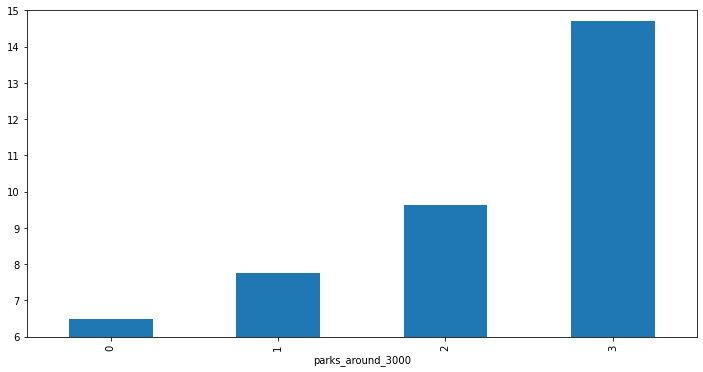

In [168]:

spb_flats.groupby('parks_around_3000')['last_price'].mean().plot( kind='bar', figsize=(12,6))
plt.ylim(6,15)

–ò–∑ –≥—Ä–∞—Ñ–∏–∫–∞ –≤–∏–¥–Ω–æ, —á—Ç–æ –Ω–∞–ª–∏—á–∏–µ –ø–∞—Ä–∫–æ–≤ –≤ —Ä–∞–¥–∏—É—Å–µ 3–∫–º –≤–ª–∏—è–µ—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Ç—å –∂–∏–ª—å—è. 

–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–µ–º, –Ω–∞ —Å–∫–æ–ª—å–∫–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –∫–∞–∂–¥—ã–π –ø–∞—Ä–∫ –ø–æ–≤—ã—à–∞–µ—Ç —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã.

In [169]:
diff=[]
mean_cost_parks = spb_flats.groupby('parks_around_3000')['last_price'].mean()
mean_cost_parks
for i in range(len(mean_cost_parks)-1):
    diff.append(mean_cost_parks[i+1]-mean_cost_parks[i])
parks_mean_increase_spb = sum(diff)/len(diff)
parks_mean_increase_spb

2.742137355583379

–ò –ø—Ä–æ–¥–µ–ª–∞–µ–º —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è –ø—Ä—É–¥–æ–≤

In [170]:
diff=[]
mean_cost_ponds = spb_flats.groupby('ponds_around_3000')['last_price'].mean()
mean_cost_ponds
for i in range(len(mean_cost_ponds)-1):
    diff.append(mean_cost_ponds[i+1]-mean_cost_ponds[i])
ponds_mean_increase_spb = sum(diff)/len(diff)
ponds_mean_increase_spb

2.0811673107637723

In [171]:
print(int((ponds_mean_increase_spb / spb_flats['last_price'].mean()).round(2)*100))
print(int((parks_mean_increase_spb / spb_flats['last_price'].mean()).round(2)*100))

28
37


–ù–∞–π–¥–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –ø–∏—Ç–µ—Ä–∞ –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞. –î–ª—è —ç—Ç–æ–≥–æ –Ω–∞–π–¥–µ–º –∫–≤–∞—Ä—Ç–∏—Ä—É –≤ —Ü–µ–Ω—Ç—Ä–µ —Å –Ω–µ–Ω—É–ª–µ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞.

In [172]:
spb_flats.query("city_centers_km < 0.2 and  airports_nearest != 'NaN'")['airports_nearest'].describe()

count       73.000000
mean     21757.068493
std        806.804935
min      20641.000000
25%      21223.000000
50%      21857.000000
75%      22024.000000
max      25962.000000
Name: airports_nearest, dtype: float64

–ó–¥–µ—Å—å –º—ã –≤–∏–¥–∏–º, —á—Ç–æ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ —Ü–µ–Ω—Ç—Ä–µ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ —Å–æ–¥–µ—Ä–∂–∞—Ç —Ä–∞–∑–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –≤ –ø—Ä–æ–º–µ–∂—É—Ç–∫–µ –æ—Ç 26 –¥–æ 32 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤.
–ï—Å–ª–∏ —Å—á–∏—Ç–∞—Ç—å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞ –¥–æ –∞—Ä–æ–ø–æ—Ä—Ç–∞ –∫–∞–∫ —Å—Ä–µ–¥–Ω–µ–µ —ç—Ç–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π - 27.7 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤, –∞ —Ä–∞–¥–∏—É—Å —Ü–µ–Ω—Ç—Ä–∞ 7.5–∫–º, —Ç–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ –æ—Ç –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –¥–æ –≤–µ—Ä—Ö–Ω–µ–π –∏ –Ω–∏–∂–Ω–µ–π –≥—Ä–∞–Ω–∏—Ü—ã —Ü–µ–Ω—Ç—Ä–∞ –±—É–¥–µ—Ç 

In [173]:
27.7-7.5

20.2

In [174]:
27.7+7.5

35.2

–ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å—Ç–∏–º–æ—Å—Ç–µ–π —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –æ—Ç —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –∏ –Ω–∞–Ω–µ—Å–µ–º –Ω–∞ –Ω–µ–≥–æ –≥—Ä–∞–Ω–∏—Ü—ã —Ü–µ–Ω—Ç—Ä–∞ –≥–æ—Ä–æ–¥–∞.

(0.0, 40.0)

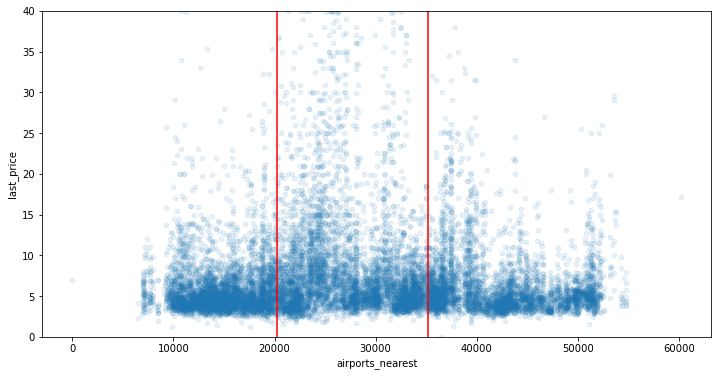

In [175]:
spb_flats['airports_nearest'] = spb_flats['airports_nearest']
spb_flats.plot(x='airports_nearest', y='last_price', kind='scatter', alpha=0.1, figsize=(12,6))
plt.axvline(x=20200, color='red')
plt.axvline(x=35200, color='red')
plt.ylim(0,40)

In [176]:
#spb_flats['airports_nearest_bins'] = pd.cut(spb_flats['airports_nearest'], 45)
spb_flats['airports_nearest_bins'] = (spb_flats['airports_nearest'] // 1000)
spb_flats['airports_nearest_bins']

0        18.0
3        28.0
4        31.0
7        23.0
9        50.0
         ... 
23687    40.0
23688    15.0
23689    17.0
23690    20.0
23694    24.0
Name: airports_nearest_bins, Length: 14099, dtype: float64

(4.5, 18.0)

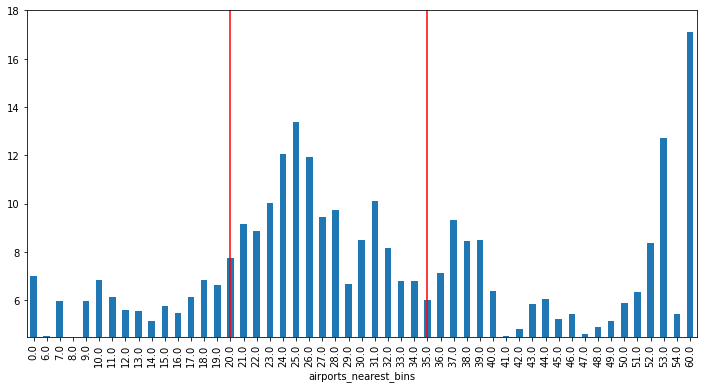

In [177]:
df_chart = spb_flats.groupby('airports_nearest_bins')['last_price'].mean()
df_chart.plot(kind='bar', figsize=(12,6))
plt.axvline(df_chart.index.searchsorted(20), color='red')
plt.axvline(df_chart.index.searchsorted(35), color='red')
plt.ylim(4.5,18)

–°–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º—É –≥—Ä–∞—Ñ–∏–∫—É –Ω–µ–ª—å–∑—è –æ–¥–Ω–æ–∑–Ω–∞—á–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –±–ª–∏–∑–æ—Å—Ç—å –∫ –∞—ç—Ä–æ–æ—Ä—Ç—É –≤–ª–∏—è–µ—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è.

#### –í—ã–≤–æ–¥

–°–æ–≥–ª–∞—Å–Ω–æ –ø–æ–ª—É—á–µ–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º –æ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∂–∏–ª—å—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è, —Ü–µ–Ω—Ç—Ä–æ–º –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ —è–≤–ª—è–µ—Ç—Å—è —Ä–∞–¥–∏—É—Å 7.5 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞, —Å –Ω–µ–±–æ–ª—å—à–∏–º –≤—ã–±—Ä–æ—Å–æ–º –≤ —Ä–∞–π–æ–Ω–µ 11 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤, —á—Ç–æ –º–æ–∂–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–æ–≤–∞—Ç—å —Ä–∞–π–æ–Ω—É –ë–µ–≥–æ–≤–æ–π –∏ –õ–∞—Ö—Ç–∞ —Ü–µ–Ω—Ç—Ä–∞.

–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Ü–µ–Ω—ã –æ—Ç –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –º–µ–Ω–µ–µ —Ä–∞–∑–º–∞–∑–∞–Ω–∞ –≤ –Ω–∏–∂–Ω–∏—Ö –¥–∏–∞–ø–∞–∑–æ–Ω–∞—Ö.

–û–¥–Ω–æ–∑–Ω–∞—á–Ω–æ –º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –Ω–∞–ª–∏—á–∏–µ –ø–∞—Ä–∫–æ–≤ –≤ —Ä–∞–¥–∏—É—Å–µ 3–∫–º –æ—Ç –∫–≤–∞—Ä—Ç–∏—Ä—ã –¥–æ–±–∞–≤–ª—è–µ—Ç –∫ –µ–µ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –≤ —Å—Ä–µ–¥–Ω–µ–º 2.7 –º–∏–ª–ª–∏–æ–Ω–∞(37% —Å—Ç–æ–∏–º–æ—Å—Ç–∏) —Ä—É–±–ª–µ–π, –∞ –∫–∞–∂–¥—ã–π –ø—Ä—É–¥ - 2–º–ª–Ω(28%).
 

###### –¶–µ–ª—å –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è

–£—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ä—ã–Ω–æ—á–Ω–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –æ–±—ä–µ–∫—Ç–æ–≤ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∑–≤–æ–ª—è—Ç –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Å–∏—Å—Ç–µ–º—É –¥–ª—è –æ—Ç—Å–ª–µ–∂–∏–≤–∞–Ω–∏—è –∞–Ω–æ–º–∞–ª–∏–π –∏ –º–æ—à–µ–Ω–Ω–∏—á–µ—Å–∫–æ–π –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å. 

## –û–±—â–∏–π –≤—ã–≤–æ–¥

* –í —Ö–æ–¥–µ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏: 
    * –í—ã—Å—á–∏—Ç–∞–ª–∏ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–ª–æ—â–∞–¥–∏ –∂–∏–ª—ã—Ö –ø–æ–º–µ—â–µ–Ω–∏–π –∏ –∫—É—Ö–æ–Ω—å –∏—Å—Ö–æ–¥—è –∏–∑ –∏–º–µ—é—â–∏—Ö—Å—è –¥–∞–Ω–Ω—ã—Ö –æ–±—â–∏—Ö –ø–ª–æ—â–∞–¥–µ–π –∫–≤–∞—Ä—Ç–∏—Ä –∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–π —Å—Ä–µ–¥–Ω–µ–π –Ω–µ–∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏.
    * –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è —ç—Ç–∞–∂–Ω–æ—Å—Ç–∏ –∑–¥–∞–Ω–∏–π –±—ã–ª–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ —ç—Ç–∞–∂–µ–π –∫–≤–∞—Ä—Ç–∏—Ä.
    * –ë—ã–ª–∏ –æ–±—Ä–∞–±–æ—Ç–∞–Ω—ã –∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –∞–Ω–æ–º–∞–ª–∏–∏ –≤ –∑–Ω–∞—á–µ–Ω–∏—è—Ö –≤—ã—Å–æ—Ç –ø–æ—Ç–æ–ª–∫–æ–≤. 
    * –ë—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —á—Ç–æ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º —Ñ–ª–∞–≥–æ–º "–∞–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç—ã", –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –∞–ø–∞—Ä—Ç–∞–º–µ–Ω—Ç–∞–º–∏ –∏, —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ, –ø—Ä–æ–ø—É—Å–∫–∏ –±—ã–ª–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏.
    * –ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ –¥–∞–Ω–Ω—ã–µ –æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ –±–∞–ª–∫–æ–Ω–æ–≤ –±—ã–ª–∏ –∏—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –Ω–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –±–∞–ª–∫–æ–Ω–æ–≤.
    * –°–æ–≥–ª–∞—Å–Ω–æ –∏–º–µ—é—â–∏–º—Å—è –¥–∞–Ω–Ω—ã–º –æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è—Ö –∏ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –∏–∑ –æ—Ç–∫—Ä—ã—Ç—ã—Ö –∏—Å—Ç–æ—á–Ω–∏–∫–æ–≤, –±—ã–ª–æ –Ω–∞–π–¥–µ–Ω–æ, –∫ –∫–∞–∫–∏–º –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã–º –ø—É–Ω–∫—Ç–∞–º –æ—Ç–Ω–æ—Å—è—Ç—Å—è –∫–≤–∞—Ä—Ç–∏—Ä—ã —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤.
    * –ü–æ —Ç–æ–º—É –∂–µ –ø—Ä–∏–Ω—Ü–∏–ø—É –±—ã–ª–∏ –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –ø—Ä–æ–ø—É—Å–∫–∏ –æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è—Ö –¥–æ –∞—ç—Ä–æ–ø–æ—Ä—Ç–æ–≤.
    * –ë—ã–ª–æ –ø—Ä–∏–Ω—è—Ç–æ —Ä–µ—à–µ–Ω–∏–µ —É–±—Ä–∞—Ç—å –∏–∑ –¥–∞—Ç–∞—Ñ—Ä—ç–π–º–∞ –∑–∞–ø–∏—Å–∏ –æ –∫–≤–∞—Ä—Ç–∏—Ä–∞—Ö –¥–æ—Ä–æ–∂–µ 100 –º–∏–ª–ª–∏–æ–Ω–æ–≤, —Ç–∞–∫ –∫–∞–∫ –æ–Ω–∏ —Ä–µ–¥–∫–∏–µ –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Ä–µ–ø—Ä–µ–∑–µ–Ω—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤—ã–±–æ—Ä–∫–∏ –ø—Ä–∏ –ø–æ–¥—Å—á–µ—Ç–µ —Å—Ä–µ–¥–Ω–∏—Ö –ø–æ–∫–∞–∑–∞—Ç–µ–ª–µ–π.
    * –í –¥–∞—Ç–∞—Ñ—Ä—ç–π–º –±—ã–ª–∏ –¥–æ–±–∞–≤–ª–µ–Ω—ã –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ —Å—Ç–æ–ª–±—Ü—ã —Å —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –¥–ª—è —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞, –¥–µ–Ω—å, –Ω–µ–¥–µ–ª—è –∏ –º–µ—Å—è—Ü –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è, –∫–∞—Ç–µ–≥–æ—Ä–∏—è —ç—Ç–∞–∂–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã (–ø–µ—Ä–≤—ã–π, –ø–æ—Å–ª–µ–¥–Ω–∏–π –∏–ª–∏ –¥—Ä—É–≥–æ–π), –∞ —Ç–∞–∫ –∂–µ –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –ø–ª–æ—â–∞–¥–∏ –∏ –∫—É—Ö–Ω–∏ –∫ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã.


* –í —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö –±—ã–ª–∏ —Å–¥–µ–ª–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:
    * –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ –æ–∫—Ä–∞–∏–Ω—ã –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞, —á—Ç–æ –º–æ–∂–µ—Ç –≥–æ–≤–æ—Ä–∏—Ç—å –æ –ø–ª–æ—Ç–Ω–æ–π –º–Ω–æ–≥–æ—ç—Ç–∞–∂–Ω–æ–π –∑–∞—Å—Ç—Ä–æ–π–∫–µ –∏ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏ —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –≤ —ç—Ç–∏—Ö —Ä–∞–π–æ–Ω–∞—Ö.
    * –°–∞–º—ã–µ —á–∞—Å—Ç—ã–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è ‚Äî 1 –∏–ª–∏ 2 –∫–æ–º–∞—Ç–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –ø–ª–æ—â–∞–¥—å—é 45 –∫–≤–∞–¥—Ä–∞—Ç–Ω—ã—Ö –º–µ—Ç—Ä–æ–≤, —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –æ–∫–æ–ª–æ 4 –º–∏–ª–ª–∏–æ–Ω–æ–≤ —Ä—É–±–ª–µ–π, –≤—ã—Å–æ—Ç–æ–π –ø–æ—Ç–æ–ª–∫–æ–≤ 2.5 –º–µ—Ç—Ä–∞. 
    * –û—Å–Ω–æ–≤–Ω–∞—è –º–∞—Å—Å–∞ –∫–≤–∞—Ä—Ç–∏—Ä –ø—Ä–æ–¥–∞–µ—Ç—Å—è –≤ —Ç–µ—á–µ–Ω–∏–µ –æ—Ç 2 –º–µ—Å—è—Ü–µ–≤ –ø–æ–ª—É–≥–æ–¥–∞.
    * –ü—Ä–µ–¥–µ–ª—å–Ω–∞—è —Ü–µ–Ω–∞ —Å—Ç—É–¥–∏–π ‚Äî 10 –º–∏–ª–ª–∏–æ–Ω–æ–≤, —Ç–æ–≥–¥–∞ –∫–∞–∫ –¥–ª—è –∫–≤–∞—Ä—Ç–∏—Ä –æ—Ç 6 –∫–æ–º–Ω–∞—Ç —Ç–∞–∫–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å —è–≤–ª—è–µ—Ç—Å—è –ø—Ä–µ–¥–µ–ª—å–Ω–æ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–π.
    * –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ ‚Äî 2.5 –º–∏–ª–ª–∏–æ–Ω–∞ —Ä—É–±–ª–µ–π.
    * –ö–≤–∞—Ä—Ç–∏—Ä—ã –≤ —Ü–µ–Ω—Ç—Ä–µ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –≤ —Å—Ä–µ–¥–Ω–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—Å—è –æ—Ç 5 –¥–æ 10 –º–∏–ª–ª–∏–æ–Ω–æ–≤ —Ä—É–±–ª–µ–π.
    * –î–æ–ª—è –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–∂–∞—Ö –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ, —á–µ–º –≤ –æ–±–ª–∞—Å—Ç–∏. –ß—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–π–ª—å—Å—Ç–≤—É–µ—Ç –æ –∑–∞–ø–æ–ª–Ω–µ–Ω–Ω–æ—Å—Ç–∏ –ø–µ—Ä–≤—ã—Ö —ç—Ç–∞–∂–µ–π –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–º–∏ –ø–æ–º–µ—â–µ–Ω–∏—è–º–∏.
    * –°–æ–≥–ª–∞—Å–Ω–æ –ø—Ä–æ–≤–µ–¥–µ–Ω–Ω—ã–º –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—è–º, –Ω–∞ —Ä—ã–Ω–∫–µ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏ –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç –Ω–µ–¥–æ—Ä–æ–≥–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã, –∞ —ç–ª–∏—Ç–Ω–æ–µ –∂–∏–ª—å–µ –ø–æ—á—Ç–∏ –Ω–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–æ.
    * –¢–æ–ø-3 —Å–∞–º—ã—Ö –¥–æ—Ä–æ–≥–∏—Ö –Ω–∞—Å–µ–ª–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤ –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–æ–π –æ–±–ª–∞—Å–∏ - –ü—É—à–∫–∏–Ω, –ö—É–¥—Ä–æ–≤–æ –∏ –ü–∞—Ä–≥–æ–ª–æ–≤–æ.
    * –¢–∞–∫–∂–µ –≤ —Ä–µ–≥–∏–æ–Ω–∞—Ö –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –º–µ–Ω—å—à–µ –∫–≤–∞—Ä—Ç–∏—Ä —Å 4 –∏ –±–æ–ª–µ–µ –∫–æ–º–Ω–∞—Ç–∞–º–∏, –∏ –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã –æ–¥–Ω–æ–∫–æ–º–Ω–∞—Ç–Ω—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã.
    * –í 2014 –≥–æ–¥—É –≤ –ü–∏—Ç–µ—Ä–µ —Ä—ã–Ω–æ–∫ –∫–≤–∞—Ä—Ç–∏—Ä –∏—Å–ø—ã—Ç—ã–≤–∞–ª –¥–µ—Ñ–∏—Ü–∏—Ç, —Ç–æ–≥–¥–∞ –∫–∞–∫ –Ω–∞ —Ä—ã–Ω–∫–µ –Ω–µ–¥–≤–∏–∏–º–æ—Å—Ç–∏ –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏ –∫—Ä–∏–∑–∏—Å —Å–∫–∞–∑–∞–ª—Å—è –≥–æ—Ä–∞–∑–¥–æ –º–µ–Ω—å—à–µ.
    * –í –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ —Ü–µ–Ω–∞ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Ä–∞—Å—Ç–µ—Ç –≤–º–µ—Å—Ç–µ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∫–æ–º–Ω–∞—Ç, —Ç–æ–≥–¥–∞ –∫–∞–∫ –≤ –æ–±–ª–∞—Å—Ç–∏ —Ü–µ–Ω–∞ –º–µ–Ω—å—à–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–æ–º–Ω–∞—Ç, –Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏.
    * –¶–µ–Ω—Ç—Ä –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ä–∞–¥–∏—É—Å–æ–º 7.5–∫–º.
    * –°–∞–º—ã–º–∏ –≥–æ—Ä—è—á–∏–º–∏ –¥–ª—è —Ä—ã–Ω–∫–∞ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ —Å–µ–∑–æ–Ω–∞–º–∏ —è–≤–ª—è—é—Ç—Å—è –≤–µ—Å–Ω–∞ –∏ –æ—Å–µ–Ω—å, —Ç–æ–≥–¥–∞ –∫–∞–∫ –ª–µ—Ç–æ–º –∏ –∑–∏–º–æ–π –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è —Å–ø–∞–¥ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏–π.
    
**–ó–∞–∫–ª—é—á–µ–Ω–∏–µ**
* –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ ‚Äî 2.5 –º–∏–ª–ª–∏–æ–Ω–∞ —Ä—É–±–ª–µ–π.
* –¶–µ–Ω—Ç—Ä –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Ä–∞–¥–∏—É—Å–æ–º 7.5–∫–º –æ—Ç –ù–µ–≤—Å–∫–æ–≥–æ –ø—Ä–æ—Å–ø–µ–∫—Ç–∞, —Å –Ω–µ–±–æ–ª—å—à–∏–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º –≤ –≤–∏–¥–µ 11–∫–º –∑–æ–Ω—ã –≤ —Ä–∞–π–æ–Ω–µ –õ–∞—Ö—Ç–∞ —Ü–µ–Ω—Ç—Ä–∞.
* –ö–≤–∞—Ä—Ç–∏—Ä—ã –≤ —Ü–µ–Ω—Ç—Ä–µ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–∞ –≤ —Å—Ä–µ–¥–Ω–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—Å—è –æ—Ç 5 –¥–æ 10 –º–∏–ª–ª–∏–æ–Ω–æ–≤ —Ä—É–±–ª–µ–π.
* –ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –∫–≤–∞—Ä—Ç–∏—Ä –Ω–∞—Ö–æ–¥—è—Ç—Å—è –≤ —Ä–∞–∑–∏—É—Å–µ –æ—Ç 10 –¥–æ 20 –∫–∏–ª–æ–º–µ—Ç—Ä–æ–≤ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞. –≠—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∑–∞—Å—Ç—Ä–æ–π–∫–µ —É–¥–∞–ª–µ–Ω–Ω—ã—Ö —Ä–∞–π–æ–Ω–æ–≤ –≥–æ—Ä–æ–¥–∞ –º–Ω–æ–≥–æ–∫–≤–∞—Ä—Ç–∏—Ä–Ω—ã–º–∏ –¥–æ–º–∞–º–∏. –ö–≤–∞—Ä—Ç–∏—Ä—ã –≤ —Ç–∞–∫–∏—Ö —Ä–∞–π–æ–Ω–∞—Ö –≤ –æ—Å–Ω–æ–≤–Ω–æ–º —Å—Ç–æ—è—Ç –æ—Ç 3 –¥–æ 6 –º–∏–ª–ª–∏–æ–Ω–æ–≤.
* –°—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø–ª–æ—â–∞–¥–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã, —ç—Ç–∞–∂–∞, —É–¥–∞–ª–µ–Ω–Ω–æ—Å—Ç–∏ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞, –∞ —Ç–∞–∫ –∂–µ –æ—Ç –Ω–∞–ª–∏—á–∏—è —Ä—è–¥–æ–º –ø–∞—Ä–∫–æ–≤.
* –í –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ –∫–∞–∂–¥—ã–π –ø–∞—Ä–∫ –≤ —Ä–∞–¥–∏—É—Å–µ 3–∫–º –æ—Ç –∫–≤–∞—Ä—Ç–∏—Ä—ã –ø–æ–≤—ã—à–∞–µ—Ç –µ–µ —Å—Ç–æ–∏–º–æ—Å—Ç—å –≤ —Å—Ä–µ–¥–Ω–µ–º –Ω–∞ 2.7 –º–∏–ª–ª–∏–æ–Ω–∞ —Ä—É–±–ª–µ–π, –∞ –∫–∞–∂–¥—ã–π –ø—Ä—É–¥ - 2–º–ª–Ω. 
* –í –æ–±–ª–∞—Å—Ç–∏ –ø–∞—Ä–∫–∏ –∏ –ø—Ä—É–¥—ã –¥–æ–±–∞–≤–ª—è—é—Ç –∫ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã —Ç–æ–ª—å–∫–æ 0.5–º–ª–Ω.
* –ù–∞–∏–±–æ–ª–µ–µ –¥–æ—Ä–æ–≥–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ –ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ - —ç—Ç–æ–≤–∏–¥–æ–≤—ã–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–∞ –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —ç—Ç–∞–∂–∞—Ö. –¢–æ–≥–¥–∞ –∫–∞–∫ –≤ –û–±–ª–∞—Å—Ç–∏ —Ç–∞–∫–∏–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –Ω–µ –≤ —Ü–µ–Ω–µ.
* –í–ª–∏—è–Ω–∏–µ –±–ª–∏–∑–æ—Å—Ç–∏ –∞—ç—Ä–æ–ø–æ—Ä—Ç–∞ –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞—è.
* –ù–∞–∏–±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∞—è —Å—Ç–æ–∏–º–æ—Å—Ç—å –∂–∏–ª—å—è –±—ã–ª–∞ –≤ 2014 –∏ –≤ 2015 –≥–æ–¥–∞—Ö. –ü–æ—Å–ª–µ —á–µ–≥–æ –ø—Ä–æ–∏–∑–æ—à–µ–ª —Å–ø–∞–¥. 
* –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±—ä—è–≤–ª–µ–Ω–∏–π –≤ 2014-15 –≥–æ–¥–∞—Ö –±—ã–ª–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ –Ω–∏–∂–µ –ø–æ—Å–ª–µ–¥—É—é—â–∏—Ö.

## –ß–µ–∫-–ª–∏—Å—Ç –≥–æ—Ç–æ–≤–Ω–æ—Å—Ç–∏ –ø—Ä–æ–µ–∫—Ç–∞

–ü–æ—Å—Ç–∞–≤—å—Ç–µ 'x' –≤ –≤—ã–ø–æ–ª–Ω–µ–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö. –î–∞–ª–µ–µ –Ω–∞–∂–º–∏—Ç–µ Shift+Enter.

- [x]  –æ—Ç–∫—Ä—ã—Ç —Ñ–∞–π–ª
- [x]  —Ñ–∞–π–ª—ã –∏–∑—É—á–µ–Ω—ã (–≤—ã–≤–µ–¥–µ–Ω—ã –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏, –º–µ—Ç–æ–¥ `info()`)
- [x]  –æ–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
- [x]  –∑–∞–ø–æ–ª–Ω–µ–Ω—ã –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è
- [x]  –µ—Å—Ç—å –ø–æ—è—Å–Ω–µ–Ω–∏–µ, –∫–∞–∫–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –æ–±–Ω–∞—Ä—É–∂–µ–Ω—ã
- [x]  –∏–∑–º–µ–Ω–µ–Ω—ã —Ç–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö
- [x]  –µ—Å—Ç—å –ø–æ—è—Å–Ω–µ–Ω–∏–µ, –≤ –∫–∞–∫–∏—Ö —Å—Ç–æ–ª–±—Ü–∞—Ö –∏–∑–º–µ–Ω–µ–Ω—ã —Ç–∏–ø—ã –∏ –ø–æ—á–µ–º—É
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: —Ü–µ–Ω–∞ –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: –¥–µ–Ω—å –Ω–µ–¥–µ–ª–∏, –º–µ—Å—è—Ü –∏ –≥–æ–¥ –ø—É–±–ª–∏–∫–∞—Ü–∏–∏ –æ–±—ä—è–≤–ª–µ–Ω–∏—è
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: —ç—Ç–∞–∂ –∫–≤–∞—Ä—Ç–∏—Ä—ã; –≤–∞—Ä–∏–∞–Ω—Ç—ã ‚Äî –ø–µ—Ä–≤—ã–π, –ø–æ—Å–ª–µ–¥–Ω–∏–π, –¥—Ä—É–≥–æ–π
- [x]  –ø–æ—Å—á–∏—Ç–∞–Ω–æ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–æ –≤ —Ç–∞–±–ª–∏—Ü—É: —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∂–∏–ª–æ–π –∏ –æ–±—â–µ–π –ø–ª–æ—â–∞–¥–∏, –∞ —Ç–∞–∫–∂–µ –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–ª–æ—â–∞–¥–∏ –∫—É—Ö–Ω–∏ –∫ –æ–±—â–µ–π
- [x]  –∏–∑—É—á–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: –ø–ª–æ—â–∞–¥—å, —Ü–µ–Ω–∞, —á–∏—Å–ª–æ –∫–æ–º–Ω–∞—Ç, –≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤
- [x]  –ø–æ—Å—Ç—Ä–æ–µ–Ω—ã –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: ¬´–ò–∑—É—á–∏—Ç–µ –≤—Ä–µ–º—è –ø—Ä–æ–¥–∞–∂–∏ –∫–≤–∞—Ä—Ç–∏—Ä—ã. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –∏ –º–µ–¥–∏–∞–Ω—É. –û–ø–∏—à–∏—Ç–µ, —Å–∫–æ–ª—å–∫–æ –æ–±—ã—á–Ω–æ –∑–∞–Ω–∏–º–∞–µ—Ç –ø—Ä–æ–¥–∞–∂–∞. –ö–æ–≥–¥–∞ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å, —á—Ç–æ –ø—Ä–æ–¥–∞–∂–∏ –ø—Ä–æ—à–ª–∏ –æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ, –∞ –∫–æ–≥–¥–∞ –Ω–µ–æ–±—ã—á–Ω–æ –¥–æ–ª–≥–æ?¬ª
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: ¬´–£–±–µ—Ä–∏—Ç–µ —Ä–µ–¥–∫–∏–µ –∏ –≤—ã–±–∏–≤–∞—é—â–∏–µ—Å—è –∑–Ω–∞—á–µ–Ω–∏—è. –û–ø–∏—à–∏—Ç–µ, –∫–∞–∫–∏–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –æ–±–Ω–∞—Ä—É–∂–∏–ª–∏¬ª.
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: ¬´–ö–∞–∫–∏–µ —Ñ–∞–∫—Ç–æ—Ä—ã –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ –≤–ª–∏—è—é—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã? –ò–∑—É—á–∏—Ç–µ, –∑–∞–≤–∏—Å–∏—Ç –ª–∏ —Ü–µ–Ω–∞ –æ—Ç –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞, —á–∏—Å–ª–∞ –∫–æ–º–Ω–∞—Ç, —ç—Ç–∞–∂–∞ (–ø–µ—Ä–≤–æ–≥–æ –∏–ª–∏ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ), —É–¥–∞–ª—ë–Ω–Ω–æ—Å—Ç–∏ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞. –¢–∞–∫–∂–µ –∏–∑—É—á–∏—Ç–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Ç –¥–∞—Ç—ã —Ä–∞–∑–º–µ—â–µ–Ω–∏—è: –¥–Ω—è –Ω–µ–¥–µ–ª–∏, –º–µ—Å—è—Ü–∞ –∏ –≥–æ–¥–∞¬ª. 
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: ¬´–í—ã–±–µ—Ä–∏—Ç–µ 10 –Ω–∞—Å–µ–ª—ë–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º –æ–±—ä—è–≤–ª–µ–Ω–∏–π. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –∫–≤–∞–¥—Ä–∞—Ç–Ω–æ–≥–æ –º–µ—Ç—Ä–∞ –≤ —ç—Ç–∏—Ö –Ω–∞—Å–µ–ª—ë–Ω–Ω—ã—Ö –ø—É–Ω–∫—Ç–∞—Ö. –í—ã–¥–µ–ª–∏—Ç–µ –Ω–∞—Å–µ–ª—ë–Ω–Ω—ã–µ –ø—É–Ω–∫—Ç—ã —Å —Å–∞–º–æ–π –≤—ã—Å–æ–∫–æ–π –∏ –Ω–∏–∑–∫–æ–π —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –∂–∏–ª—å—è. –≠—Ç–∏ –¥–∞–Ω–Ω—ã–µ –º–æ–∂–Ω–æ –Ω–∞–π—Ç–∏ –ø–æ –∏–º–µ–Ω–∏ –≤ —Å—Ç–æ–ª–±—Ü–µ `locality_name`¬ª.
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: ¬´–ò–∑—É—á–∏—Ç–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –∫–≤–∞—Ä—Ç–∏—Ä: –¥–ª—è –∫–∞–∂–¥–æ–π –∫–≤–∞—Ä—Ç–∏—Ä—ã –µ—Å—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–∏ –¥–æ —Ü–µ–Ω—Ç—Ä–∞. –í—ã–¥–µ–ª–∏—Ç–µ –∫–≤–∞—Ä—Ç–∏—Ä—ã –≤ –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥–µ (`locality_name`). –í–∞—à–∞ –∑–∞–¥–∞—á–∞ ‚Äî –≤—ã—è—Å–Ω–∏—Ç—å, –∫–∞–∫–∞—è –æ–±–ª–∞—Å—Ç—å –≤—Ö–æ–¥–∏—Ç –≤ —Ü–µ–Ω—Ç—Ä. –°–æ–∑–¥–∞–π—Ç–µ —Å—Ç–æ–ª–±–µ—Ü —Å —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º –¥–æ —Ü–µ–Ω—Ç—Ä–∞ –≤ –∫–∏–ª–æ–º–µ—Ç—Ä–∞—Ö: –æ–∫—Ä—É–≥–ª–∏—Ç–µ –¥–æ —Ü–µ–ª—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π. –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω—é—é —Ü–µ–Ω—É –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–∏–ª–æ–º–µ—Ç—Ä–∞. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥—Ä–∞—Ñ–∏–∫: –æ–Ω –¥–æ–ª–∂–µ–Ω –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å, –∫–∞–∫ —Ü–µ–Ω–∞ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —É–¥–∞–ª—ë–Ω–Ω–æ—Å—Ç–∏ –æ—Ç —Ü–µ–Ω—Ç—Ä–∞. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –≥—Ä–∞–Ω–∏—Ü—É, –≥–¥–µ –≥—Ä–∞—Ñ–∏–∫ —Å–∏–ª—å–Ω–æ –º–µ–Ω—è–µ—Ç—Å—è ‚Äî —ç—Ç–æ –∏ –±—É–¥–µ—Ç —Ü–µ–Ω—Ç—Ä–∞–ª—å–Ω–∞—è –∑–æ–Ω–∞¬ª.
- [x]  –≤—ã–ø–æ–ª–Ω–µ–Ω–æ –∑–∞–¥–∞–Ω–∏–µ: ¬´–í—ã–¥–µ–ª–∏—Ç–µ —Å–µ–≥–º–µ–Ω—Ç –∫–≤–∞—Ä—Ç–∏—Ä –≤ —Ü–µ–Ω—Ç—Ä–µ. –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —ç—Ç—É —Ç–µ—Ä—Ä–∏—Ç–æ—Ä–∏—é –∏ –∏–∑—É—á–∏—Ç–µ —Å–ª–µ–¥—É—é—â–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: –ø–ª–æ—â–∞–¥—å, —Ü–µ–Ω–∞, —á–∏—Å–ª–æ –∫–æ–º–Ω–∞—Ç, –≤—ã—Å–æ—Ç–∞ –ø–æ—Ç–æ–ª–∫–æ–≤. –¢–∞–∫–∂–µ –≤—ã–¥–µ–ª–∏—Ç–µ —Ñ–∞–∫—Ç–æ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤–ª–∏—è—é—Ç –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –∫–≤–∞—Ä—Ç–∏—Ä—ã (—á–∏—Å–ª–æ –∫–æ–º–Ω–∞—Ç, —ç—Ç–∞–∂, —É–¥–∞–ª—ë–Ω–Ω–æ—Å—Ç—å –æ—Ç —Ü–µ–Ω—Ç—Ä–∞, –¥–∞—Ç–∞ —Ä–∞–∑–º–µ—â–µ–Ω–∏—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è). –°–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥—ã. –û—Ç–ª–∏—á–∞—é—Ç—Å—è –ª–∏ –æ–Ω–∏ –æ—Ç –æ–±—â–∏—Ö –≤—ã–≤–æ–¥–æ–≤ –ø–æ –≤—Å–µ–π –±–∞–∑–µ?¬ª
- [x]  –≤ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ –µ—Å—Ç—å –≤—ã–≤–æ–¥—ã
- [x]  –µ—Å—Ç—å –æ–±—â–∏–π –≤—ã–≤–æ–¥